#Banking Customers Clustering


By : **Jasser Cherif** And **Saber Ben Zineb** 

# Dataset Information

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

## Content

There are 25 variables:

1. **ID**: ID of each client
2. **LIMIT_BAL**: Amount of given credit in NT dollars (includes individual and family/supplementary credit)
3. **SEX**: Gender (1=male, 2=female)
4. **EDUCATION**: Education level (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
5. **MARRIAGE**: Marital status (1=married, 2=single, 3=others)
6. **AGE**: Age in years
7. **PAY_0**: Repayment status in September, 2005  
   (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
8. **PAY_2**: Repayment status in August, 2005 (scale same as above)
9. **PAY_3**: Repayment status in July, 2005 (scale same as above)
10. **PAY_4**: Repayment status in June, 2005 (scale same as above)
11. **PAY_5**: Repayment status in May, 2005 (scale same as above)
12. **PAY_6**: Repayment status in April, 2005 (scale same as above)
13. **BILL_AMT1**: Amount of bill statement in September, 2005 (NT dollar)
14. **BILL_AMT2**: Amount of bill statement in August, 2005 (NT dollar)
15. **BILL_AMT3**: Amount of bill statement in July, 2005 (NT dollar)
16. **BILL_AMT4**: Amount of bill statement in June, 2005 (NT dollar)
17. **BILL_AMT5**: Amount of bill statement in May, 2005 (NT dollar)
18. **BILL_AMT6**: Amount of bill statement in April, 2005 (NT dollar)
19. **PAY_AMT1**: Amount of previous payment in September, 2005 (NT dollar)
20. **PAY_AMT2**: Amount of previous payment in August, 2005 (NT dollar)
21. **PAY_AMT3**: Amount of previous payment in July, 2005 (NT dollar)
22. **PAY_AMT4**: Amount of previous payment in June, 2005 (NT dollar)
23. **PAY_AMT5**: Amount of previous payment in May, 2005 (NT dollar)
24. **PAY_AMT6**: Amount of previous payment in April, 2005 (NT dollar)
25. **default.payment.next.month**: Default payment (1=yes, 0=no)


##Data Exploration



In [1]:
!pip install missingno

In [2]:
import pandas as pd    # to handle the dataframe
pd.set_option('expand_frame_repr', False) #to avoid the multi-lines formatting of the dataframe
import numpy as np     # to handle numbers and ndarray
import missingno as msno #to visualize missing data and get a quick visual summary of the completeness of the data

In [3]:
df = pd.read_csv('/content/UCI_Credit_Card.csv')


In [4]:
df.shape

(30000, 25)

In [5]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [6]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [7]:
for column_name in df.columns:
    print(df[column_name])
    print("\n")

0            1
1            2
2            3
3            4
4            5
         ...  
29995    29996
29996    29997
29997    29998
29998    29999
29999    30000
Name: ID, Length: 30000, dtype: int64


0         20000.0
1        120000.0
2         90000.0
3         50000.0
4         50000.0
           ...   
29995    220000.0
29996    150000.0
29997     30000.0
29998     80000.0
29999     50000.0
Name: LIMIT_BAL, Length: 30000, dtype: float64


0        2
1        2
2        2
3        2
4        1
        ..
29995    1
29996    1
29997    1
29998    1
29999    1
Name: SEX, Length: 30000, dtype: int64


0        2
1        2
2        2
3        2
4        2
        ..
29995    3
29996    3
29997    2
29998    3
29999    2
Name: EDUCATION, Length: 30000, dtype: int64


0        1
1        2
2        2
3        1
4        1
        ..
29995    1
29996    2
29997    2
29998    1
29999    1
Name: MARRIAGE, Length: 30000, dtype: int64


0        24
1        26
2        34
3        37
4  

In [8]:
df.head(7)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [10]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [11]:
print('Number of missing values per column')
for colm in df.columns:
 n_mv=df[colm].isnull().sum()
 print(f'{colm}: {n_mv}')

Number of missing values per column
ID: 0
LIMIT_BAL: 0
SEX: 0
EDUCATION: 0
MARRIAGE: 0
AGE: 0
PAY_0: 0
PAY_2: 0
PAY_3: 0
PAY_4: 0
PAY_5: 0
PAY_6: 0
BILL_AMT1: 0
BILL_AMT2: 0
BILL_AMT3: 0
BILL_AMT4: 0
BILL_AMT5: 0
BILL_AMT6: 0
PAY_AMT1: 0
PAY_AMT2: 0
PAY_AMT3: 0
PAY_AMT4: 0
PAY_AMT5: 0
PAY_AMT6: 0
default.payment.next.month: 0


displaying different unique values of every columns

In [12]:
df.nunique()

,0
ID,30000
LIMIT_BAL,81
SEX,2
EDUCATION,7
MARRIAGE,4
AGE,56
PAY_0,11
PAY_2,11
PAY_3,11
PAY_4,11


In [13]:
num_split=df.loc[:,df.dtypes!=object]
num_split.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [14]:
categ_split=df.loc[:,df.dtypes==object]
categ_split.head()

""
0
1
2
3
4


In [15]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [16]:
import matplotlib.pyplot as plt
import scipy.stats as stats

In [17]:
# First, select only the numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Loop through each numeric column and print the mean, median, and mode
for column_name in numeric_columns:
    print(f"Column: {column_name}")
    print(f"Mean: {df[column_name].mean()}")
    print(f"Median: {df[column_name].median()}")
    print(f"Mode: {df[column_name].mode()[0]}")  # mode() returns a series, so we take the first value
    print("-" * 40)  # Add a separator for readability

Column: ID
Mean: 15000.5
Median: 15000.5
Mode: 1
----------------------------------------
Column: LIMIT_BAL
Mean: 167484.32266666667
Median: 140000.0
Mode: 50000.0
----------------------------------------
Column: SEX
Mean: 1.6037333333333332
Median: 2.0
Mode: 2
----------------------------------------
Column: EDUCATION
Mean: 1.8531333333333333
Median: 2.0
Mode: 2
----------------------------------------
Column: MARRIAGE
Mean: 1.5518666666666667
Median: 2.0
Mode: 2
----------------------------------------
Column: AGE
Mean: 35.4855
Median: 34.0
Mode: 29
----------------------------------------
Column: PAY_0
Mean: -0.0167
Median: 0.0
Mode: 0
----------------------------------------
Column: PAY_2
Mean: -0.13376666666666667
Median: 0.0
Mode: 0
----------------------------------------
Column: PAY_3
Mean: -0.1662
Median: 0.0
Mode: 0
----------------------------------------
Column: PAY_4
Mean: -0.22066666666666668
Median: 0.0
Mode: 0
----------------------------------------
Column: PAY_5
Mean:

<Axes: >

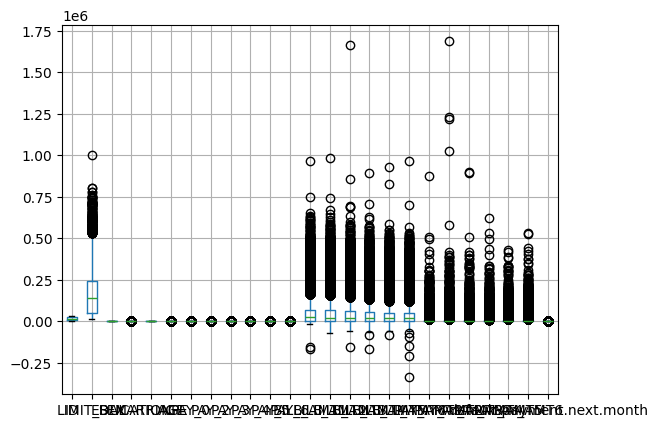

In [18]:
#boxplots
num_split.boxplot()

This Plot  shows a lot of Outliers

Missing Values

In [19]:
print('Number of missing values per column')
for colm in df.columns:
  n_mv=df[colm].isnull().sum()
  print(f'{colm}: {n_mv}')

Number of missing values per column
ID: 0
LIMIT_BAL: 0
SEX: 0
EDUCATION: 0
MARRIAGE: 0
AGE: 0
PAY_0: 0
PAY_2: 0
PAY_3: 0
PAY_4: 0
PAY_5: 0
PAY_6: 0
BILL_AMT1: 0
BILL_AMT2: 0
BILL_AMT3: 0
BILL_AMT4: 0
BILL_AMT5: 0
BILL_AMT6: 0
PAY_AMT1: 0
PAY_AMT2: 0
PAY_AMT3: 0
PAY_AMT4: 0
PAY_AMT5: 0
PAY_AMT6: 0
default.payment.next.month: 0


We Have 18 Missing value in ALP 1 in ALB 1 in ALT and 10  in CHOL we must clean our Data

Visulasation of Missing values

<Axes: >

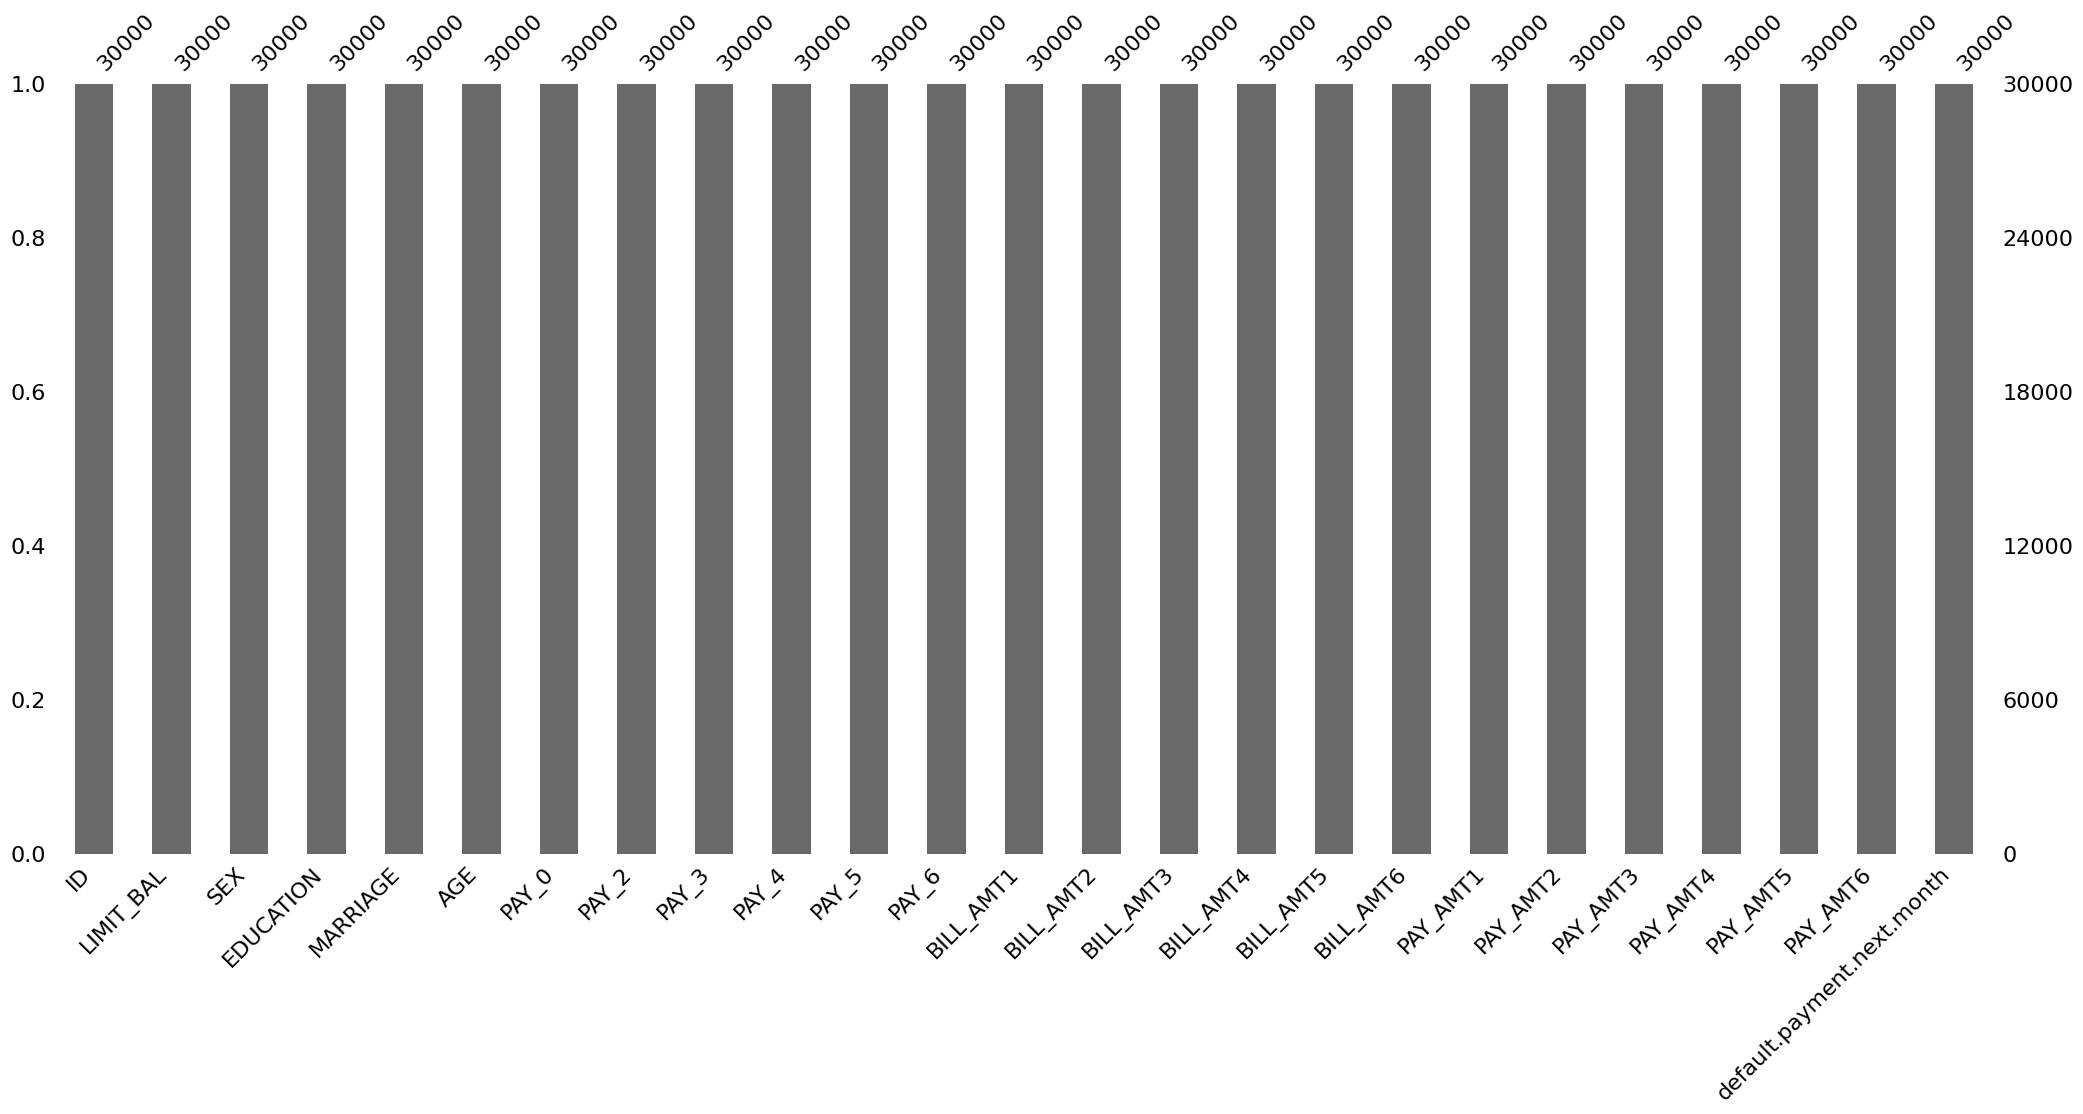

In [20]:
msno.bar(df)

Bar plots indicates how many instances we actually have from each columns meaning that it gives a visual representation of the absence of data but it doesn't indicate wheere they are located.

<Axes: >

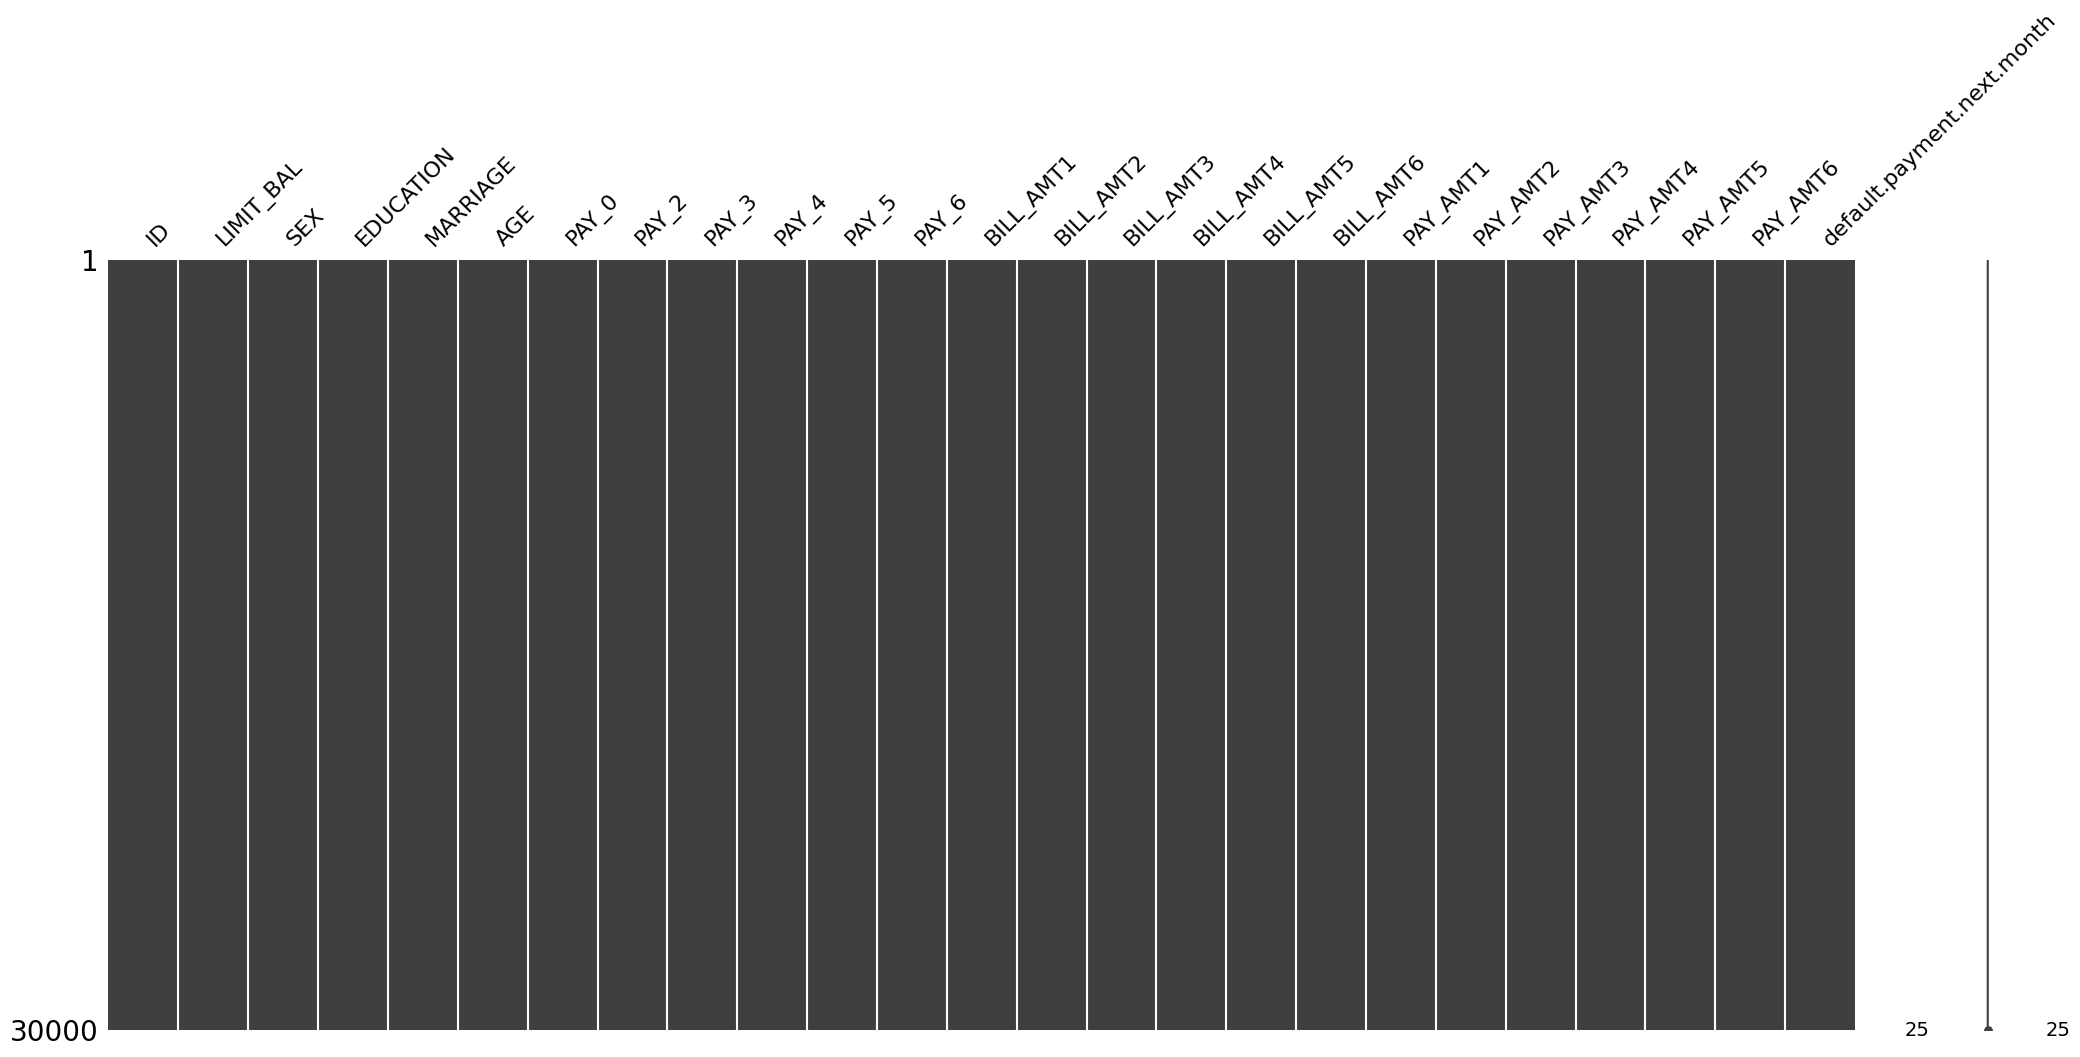

In [21]:
msno.matrix(df)

We constat that we have many missing values in the ALP column which means that we will need to put focus around treating the absence of the data as using advanced technicnis is possible due to the few numbers of missing data
Removing or deletion f the data is posible as well as we have fewe missing values.
It shows where the missing data is actually located within the dataframe

**Explanation of Missing values** : These Gaphs may help you in building a feedback on why data are mising

##Data Preprocessing


**Dealing With Noise and Outliers**

In [22]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [23]:
"""for column1 in df.columns:
  for column2 in df.columns:
    if column1!=column2:
      df.plot.scatter(x=column1, y=column2)
"""

'for column1 in df.columns:\n  for column2 in df.columns:\n    if column1!=column2:\n      df.plot.scatter(x=column1, y=column2)\n'

In [24]:
#Visualization of scatter plot for all the columns
#pd.plotting.scatter_matrix(df, alpha=0.2)

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

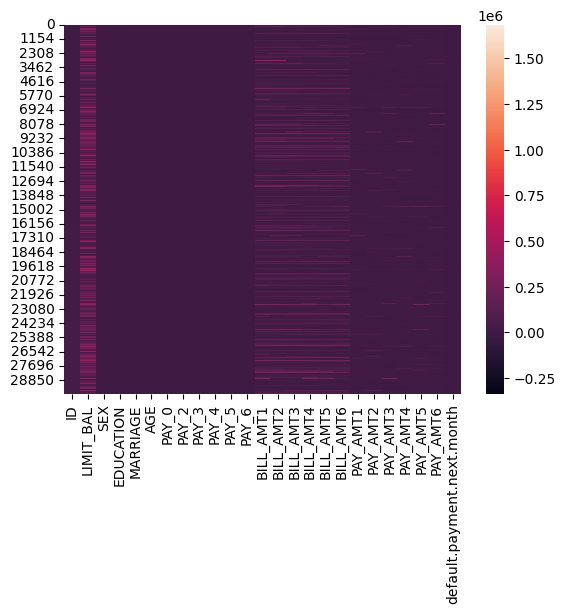

In [26]:
#heatmaps, correlation study and noise
sns.heatmap(df)

Heat

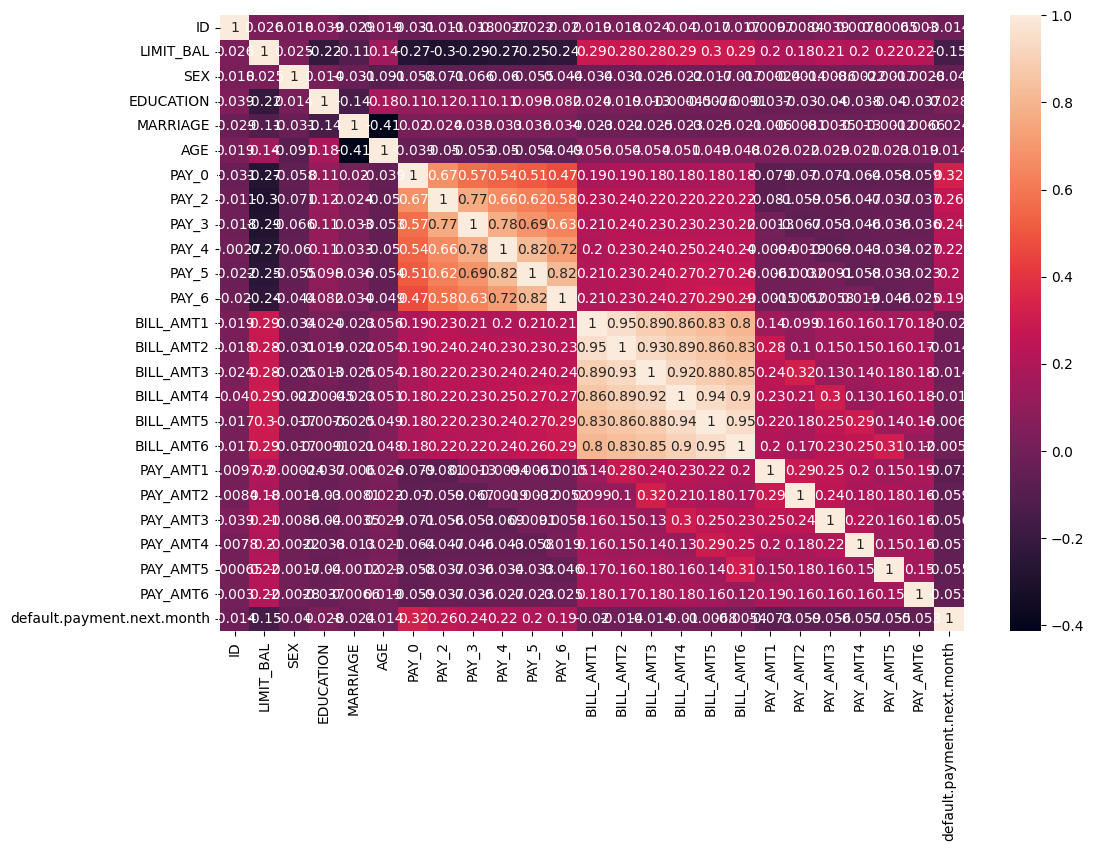

In [27]:
#heatmaps, correlation study and noise
import matplotlib.pyplot as plt
import seaborn as sns

# Définir la taille de la figure
plt.figure(figsize=(12, 8))  # Modifiez les valeurs de 12 et 8 pour la taille souhaitée

# Tracer la heatmap
sns.heatmap(df.corr(), annot=True)

# Afficher la figure
plt.show()


In [28]:
from sklearn.cluster import KMeans


In [29]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


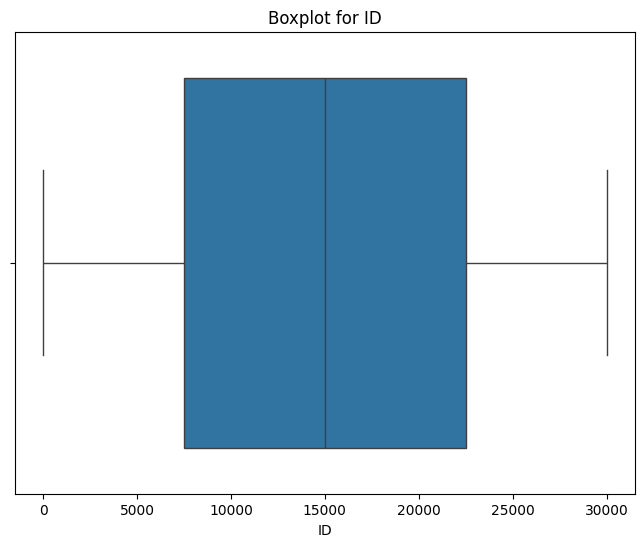

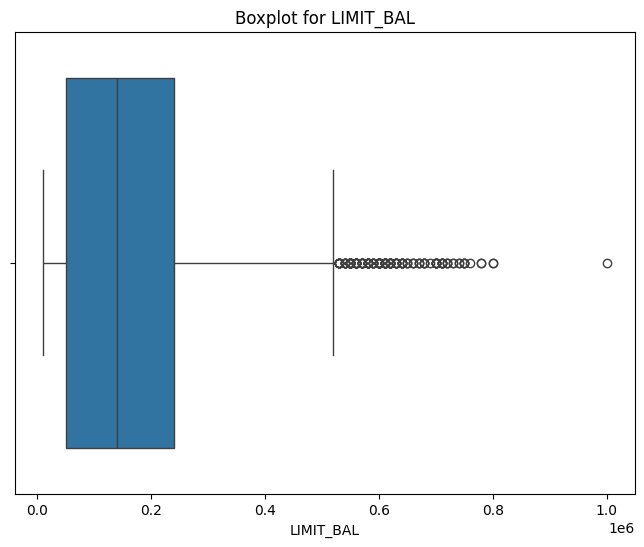

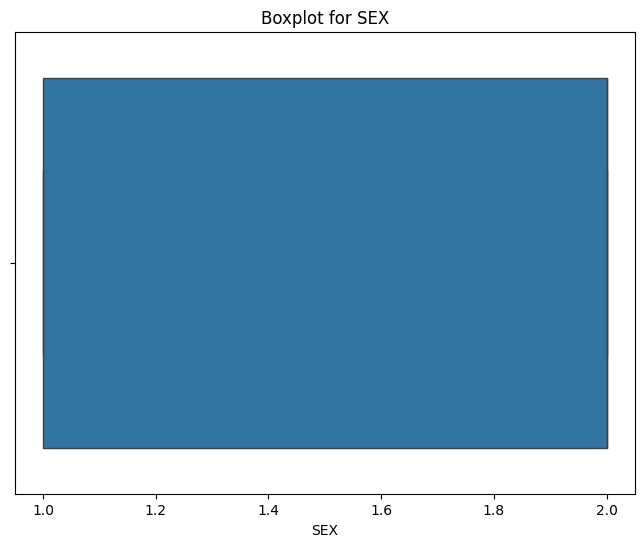

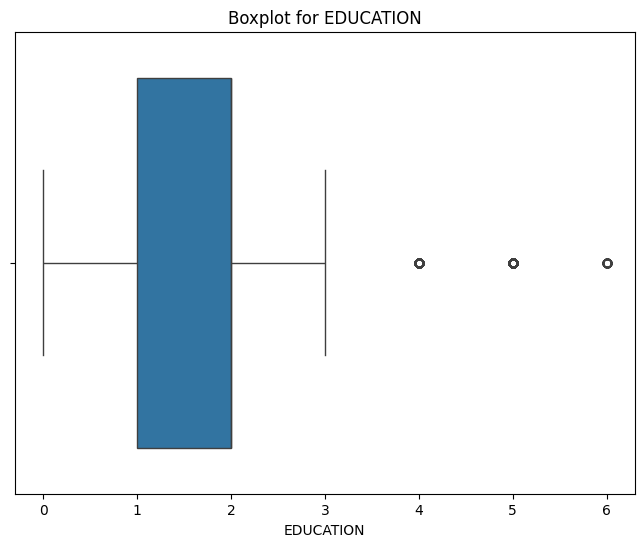

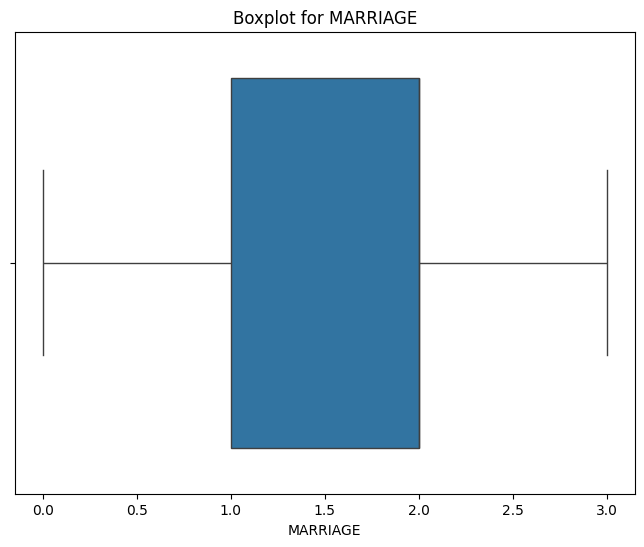

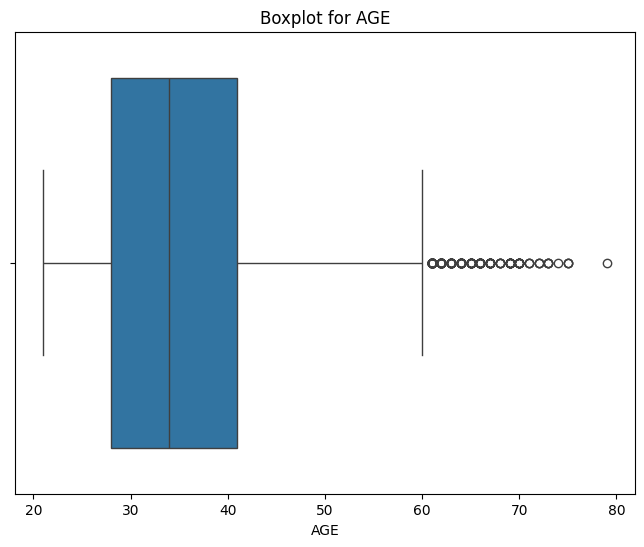

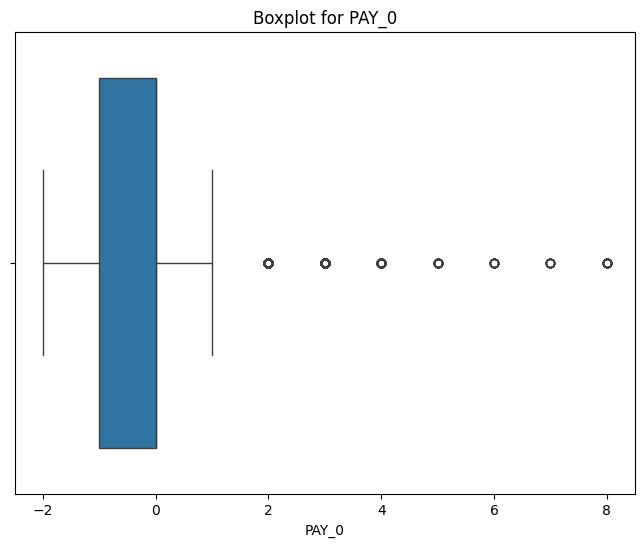

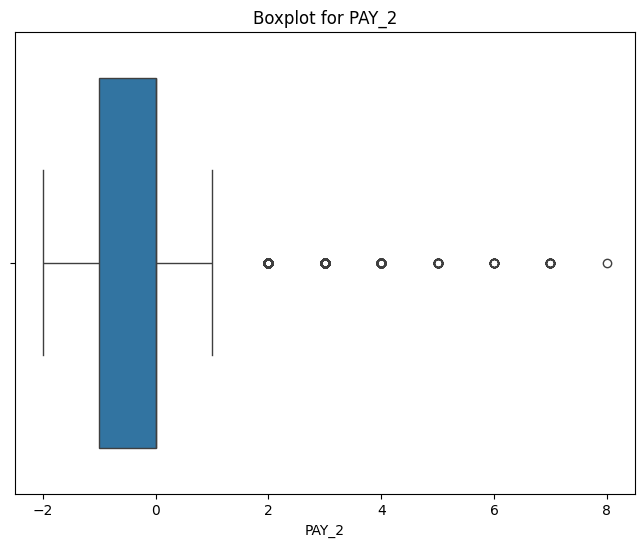

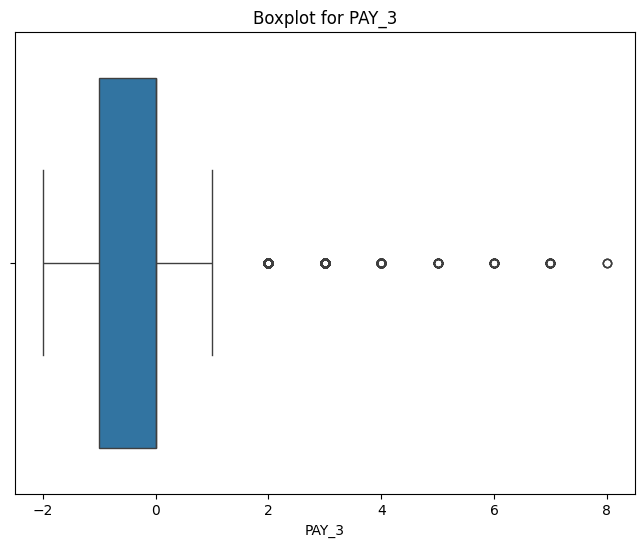

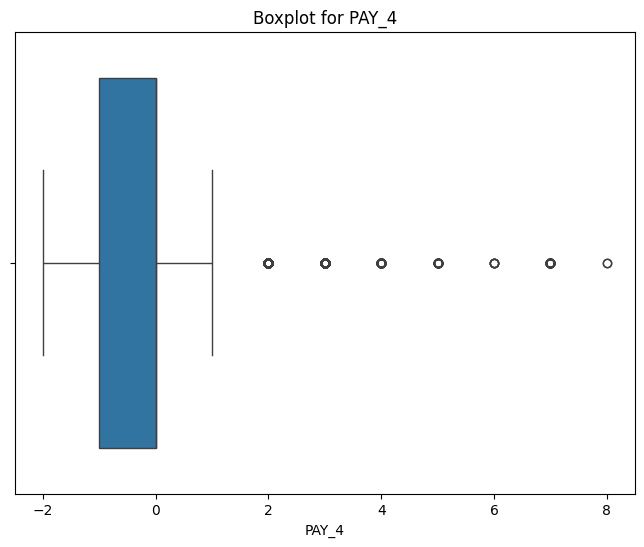

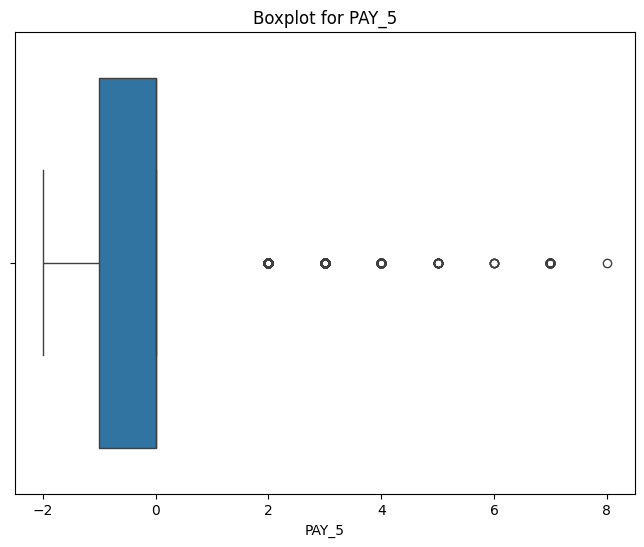

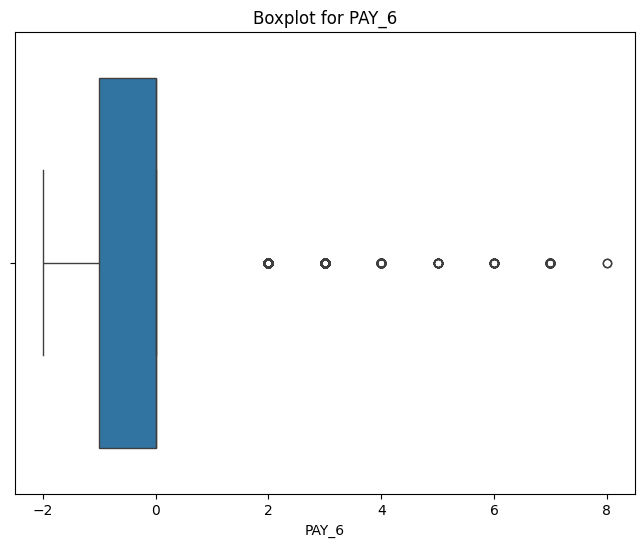

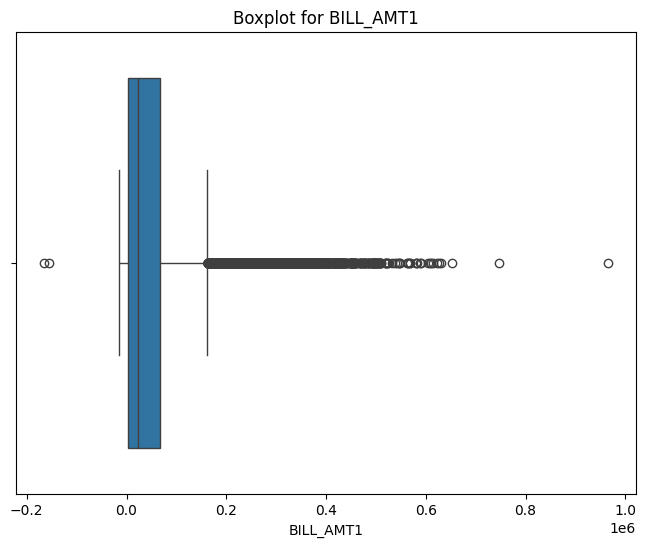

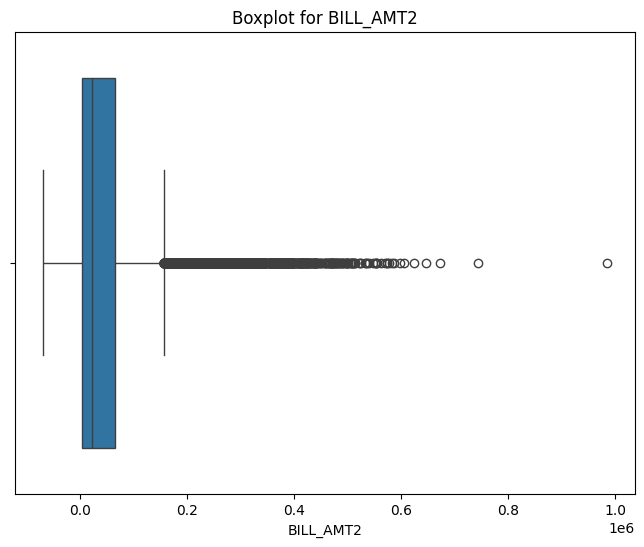

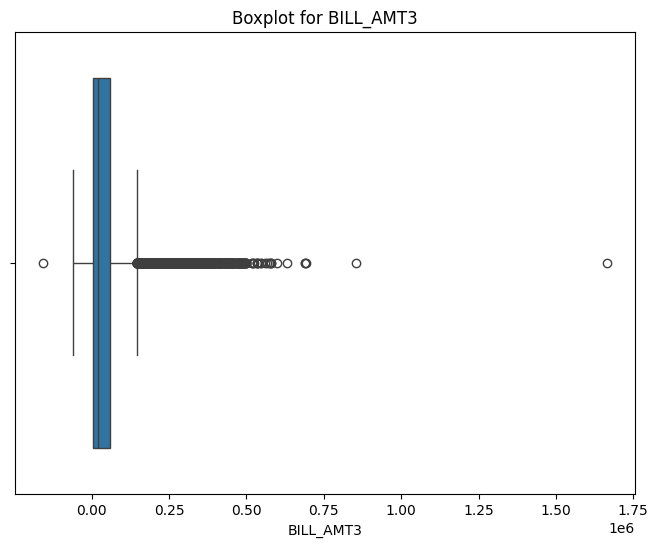

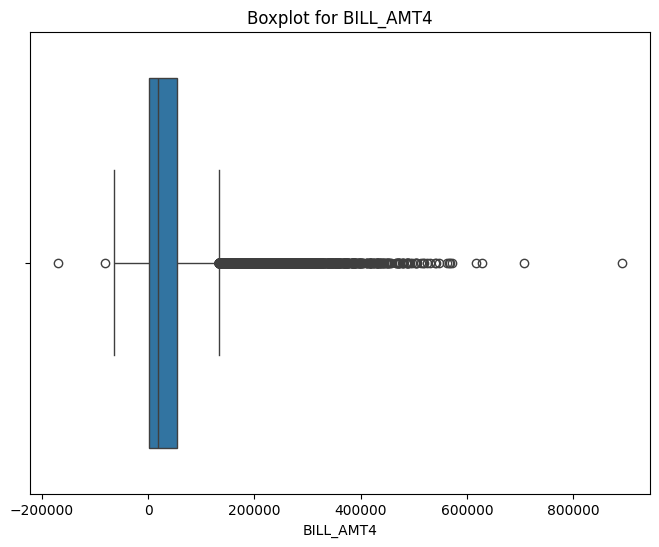

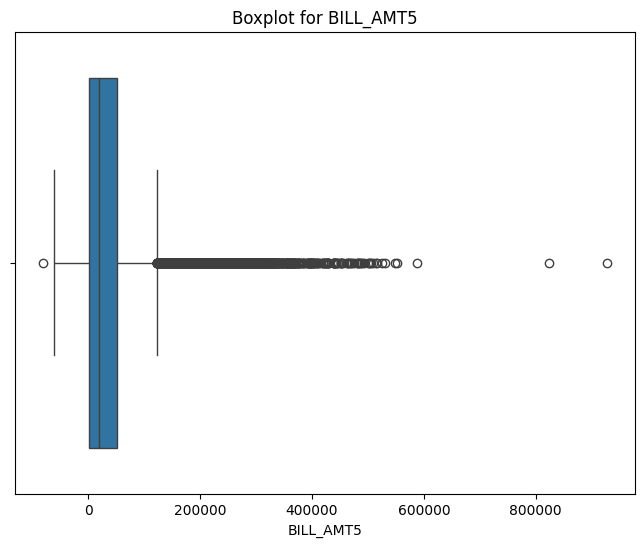

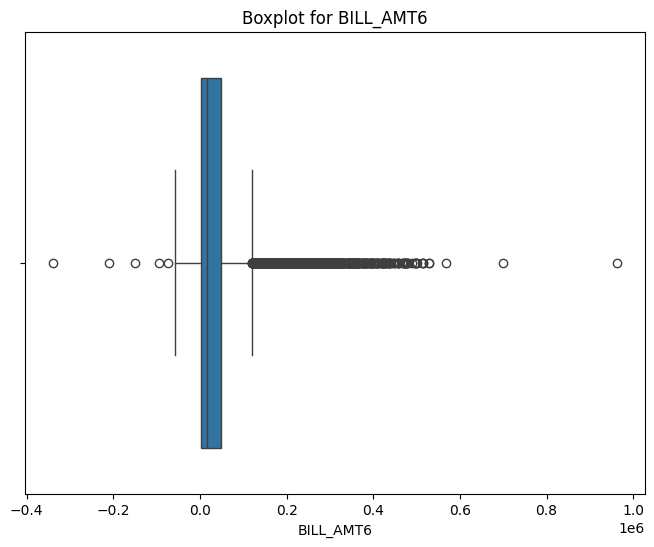

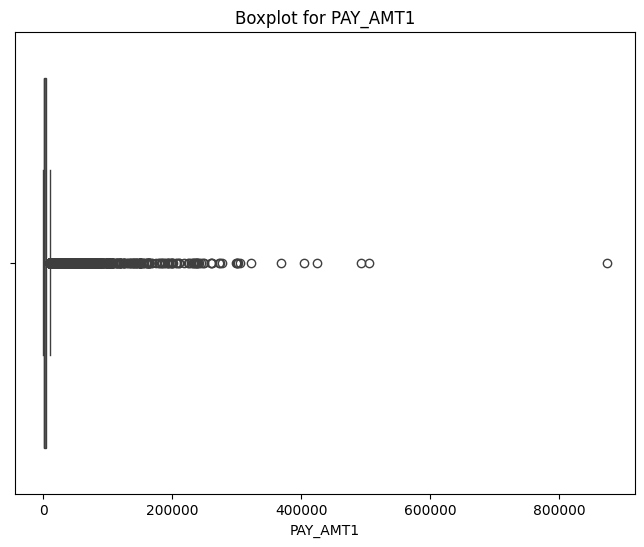

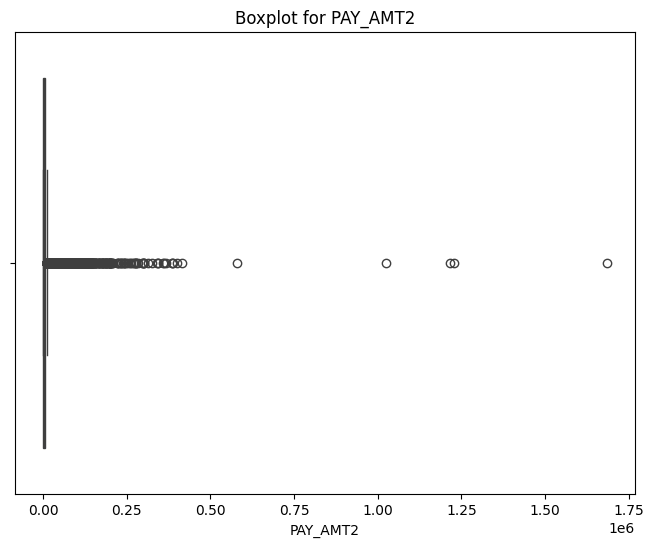

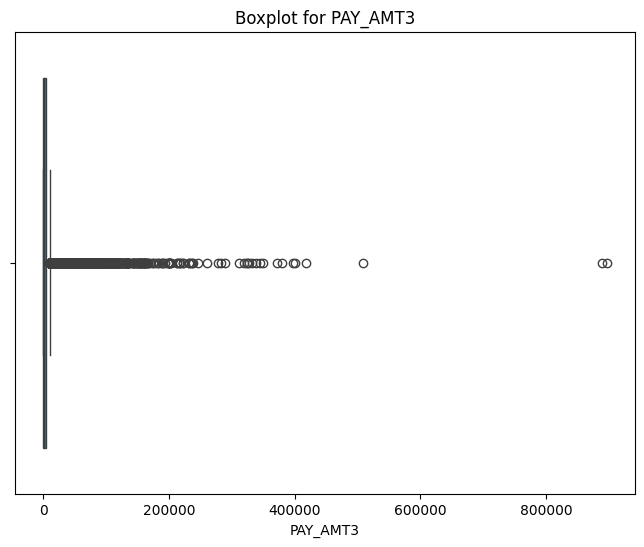

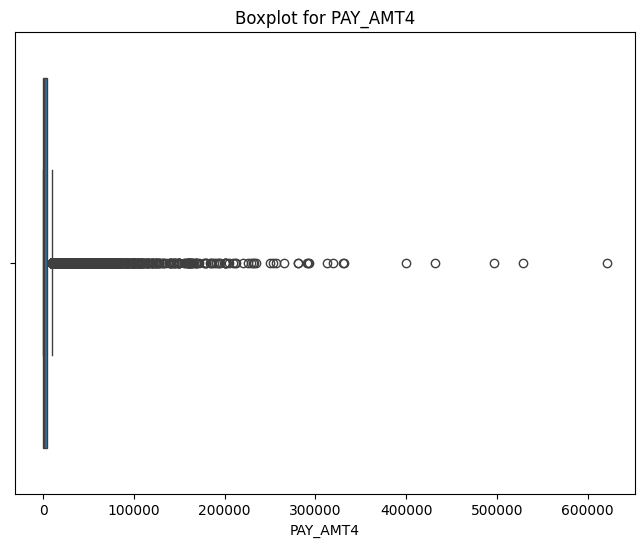

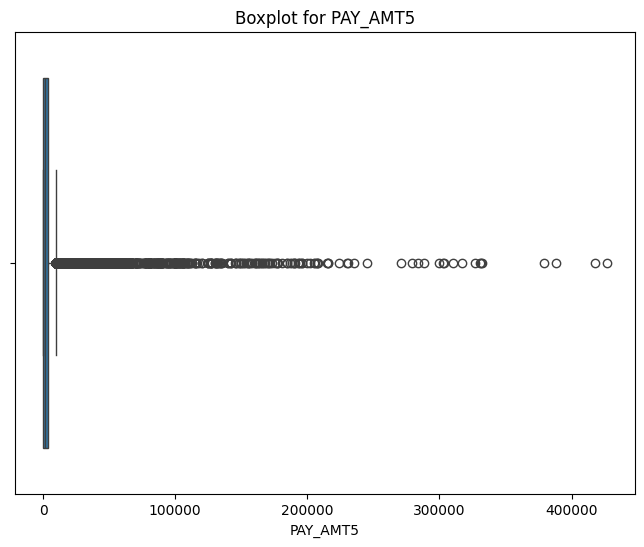

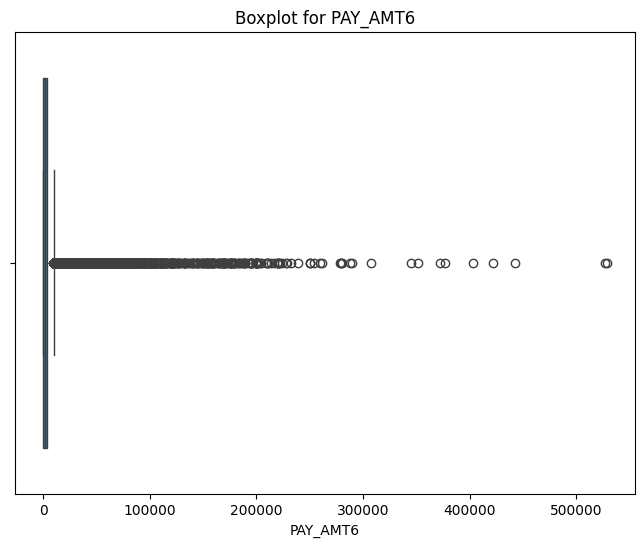

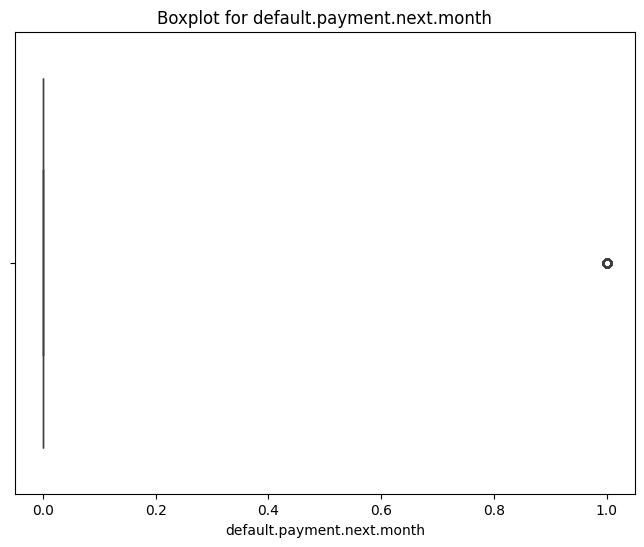

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Loop through each column in the dataframe
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    # Create a boxplot for the current column
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])

    # Set the title to the column name
    plt.title(f'Boxplot for {column}')

    # Show the plot
    plt.show()


Before Correction this plots detect a lot of outliers

In [31]:
#detection des outliers

In [32]:
import pandas as pd

# Sélectionner les colonnes numériques
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Fonction pour détecter les outliers avec l'IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Détecter les outliers dans toutes les colonnes numériques
outliers_dict = {}
for column in numerical_columns:
    outliers = detect_outliers_iqr(df, column)
    if len(outliers) > 0:
        outliers_dict[column] = len(outliers)

# Afficher les colonnes avec des outliers
outliers_dict


{'LIMIT_BAL': 167,
 'EDUCATION': 454,
 'AGE': 272,
 'PAY_0': 3130,
 'PAY_2': 4410,
 'PAY_3': 4209,
 'PAY_4': 3508,
 'PAY_5': 2968,
 'PAY_6': 3079,
 'BILL_AMT1': 2400,
 'BILL_AMT2': 2395,
 'BILL_AMT3': 2469,
 'BILL_AMT4': 2622,
 'BILL_AMT5': 2725,
 'BILL_AMT6': 2693,
 'PAY_AMT1': 2745,
 'PAY_AMT2': 2714,
 'PAY_AMT3': 2598,
 'PAY_AMT4': 2994,
 'PAY_AMT5': 2945,
 'PAY_AMT6': 2958,
 'default.payment.next.month': 6636}

In [33]:
# Clipper les outliers
def clip_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

# Appliquer cette méthode pour chaque colonne avec des outliers
for column in outliers_dict:
    df = clip_outliers(df, column)


In [34]:
df


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2.0,1,24.0,1.5,1.5,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,0
1,2,120000.0,2,2.0,2,26.0,-1.0,1.5,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,0
2,3,90000.0,2,2.0,2,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2.0,1,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2.0,1,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,11250.5,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3.0,1,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,11250.5,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3.0,2,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2.0,2,37.0,1.5,1.5,1.5,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,10677.5,4200.0,2000.0,3100.0,0
29998,29999,80000.0,1,3.0,1,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,11015.0,3409.0,1178.0,1926.0,9700.0,1804.0,0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  float64
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  float64
 6   PAY_0                       30000 non-null  float64
 7   PAY_2                       30000 non-null  float64
 8   PAY_3                       30000 non-null  float64
 9   PAY_4                       30000 non-null  float64
 10  PAY_5                       30000 non-null  float64
 11  PAY_6                       30000 non-null  float64
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

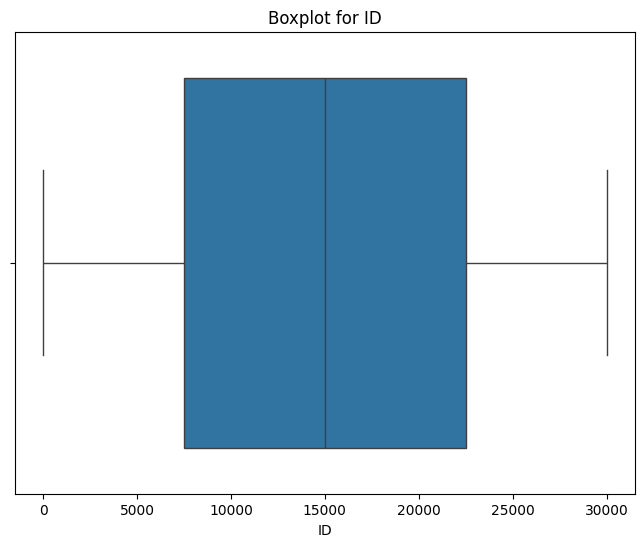

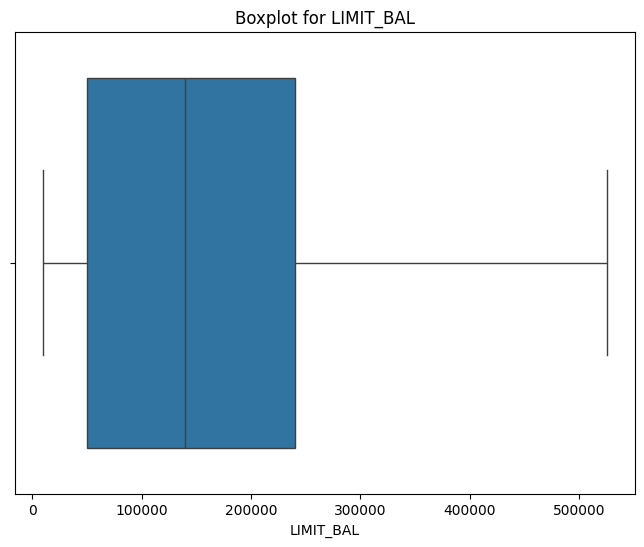

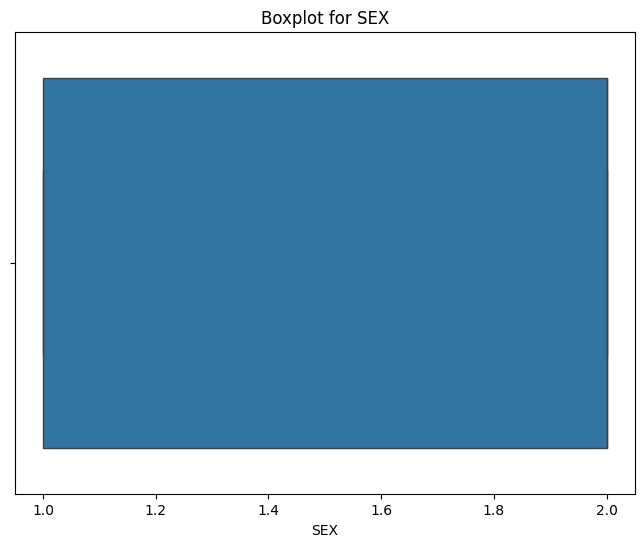

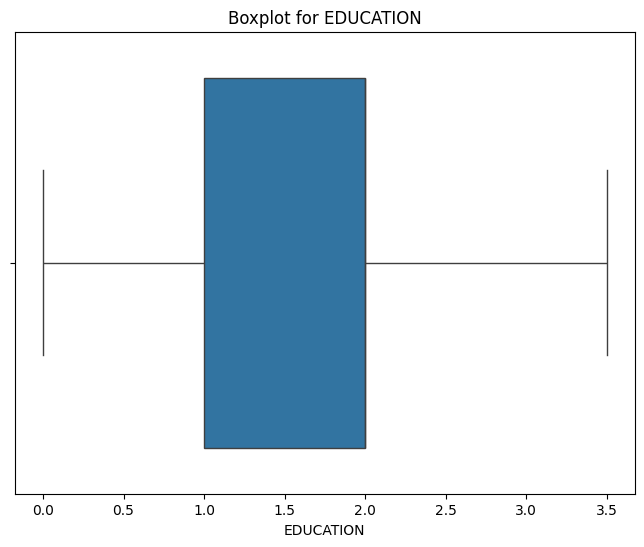

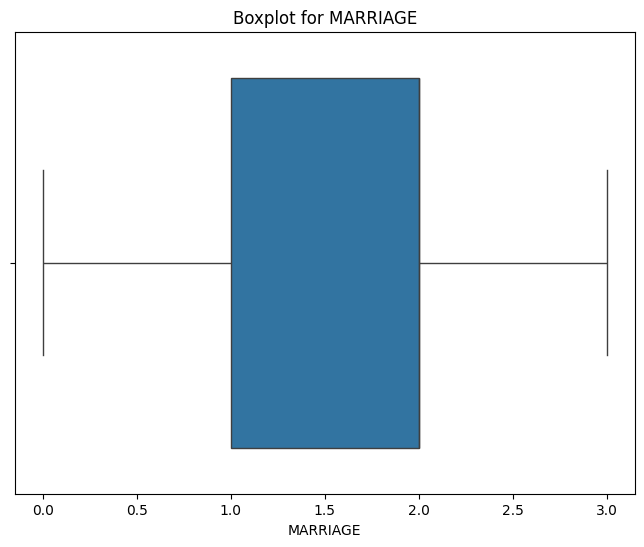

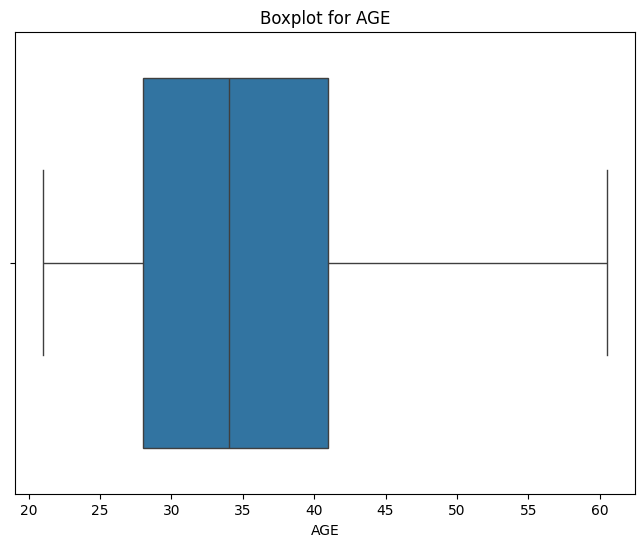

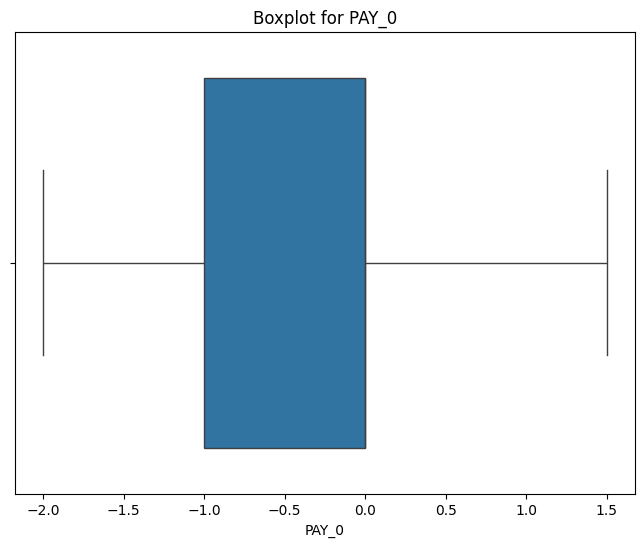

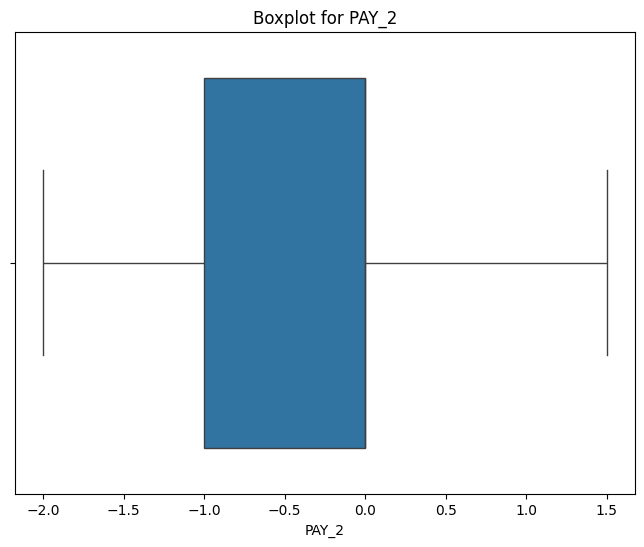

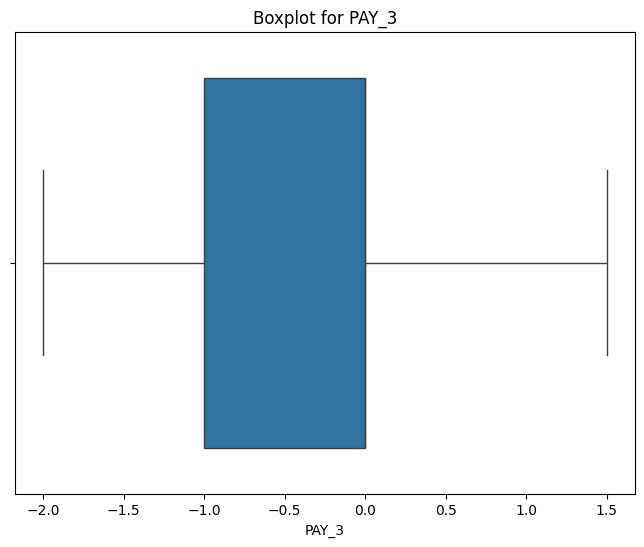

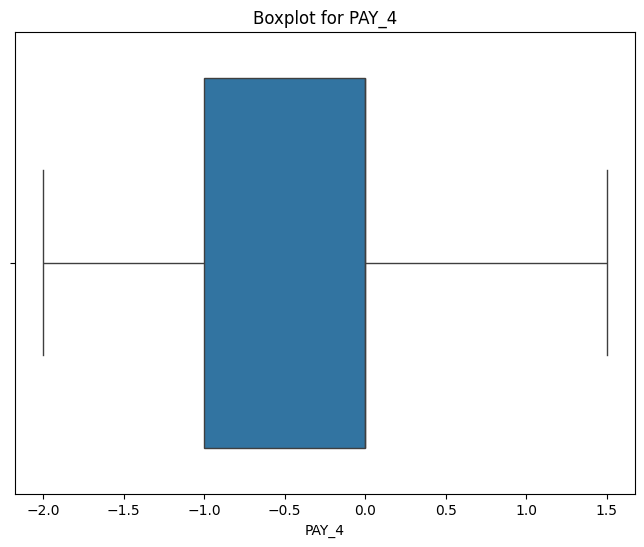

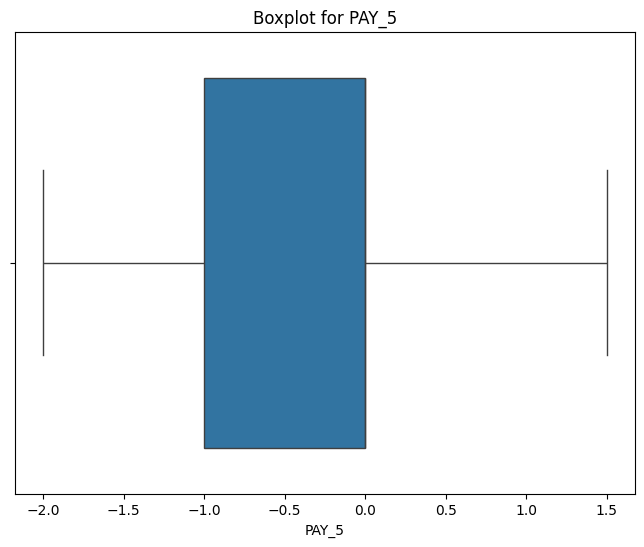

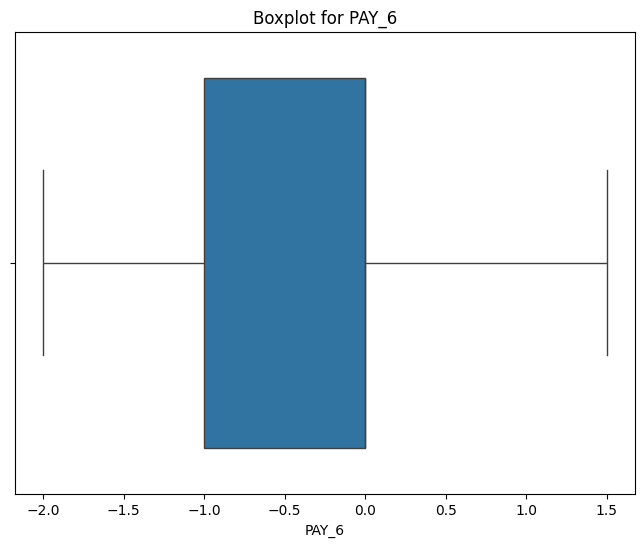

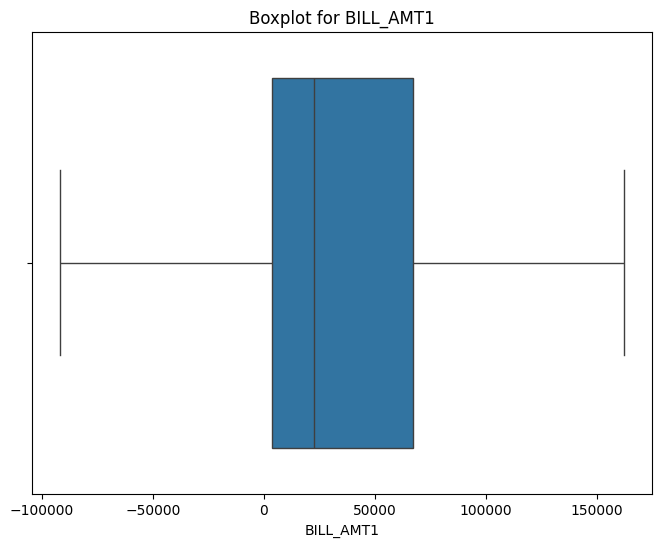

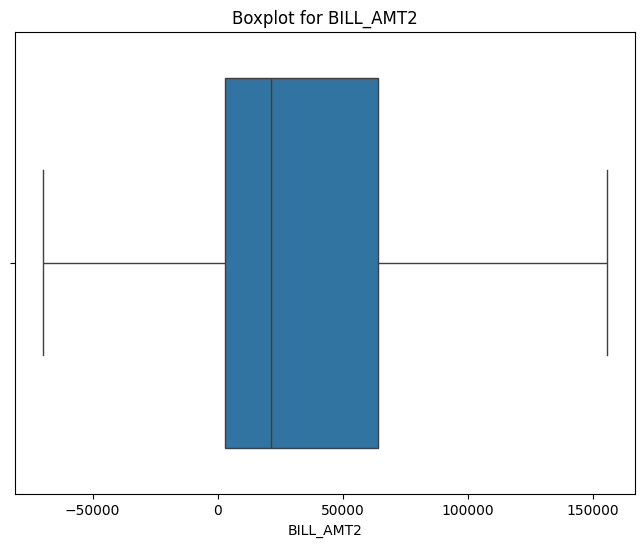

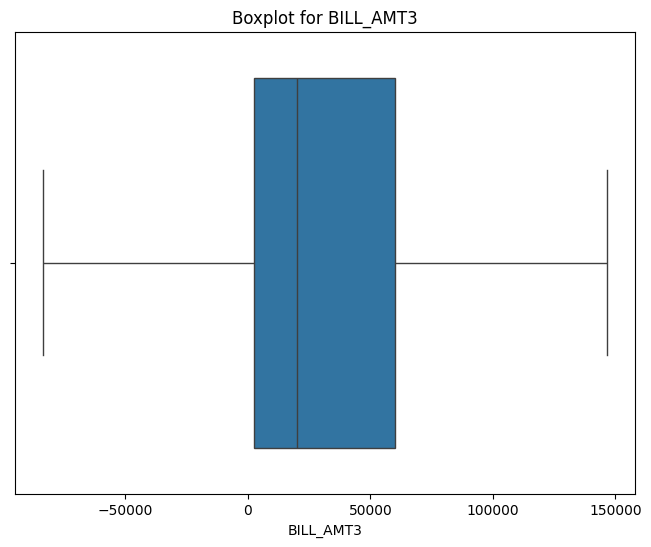

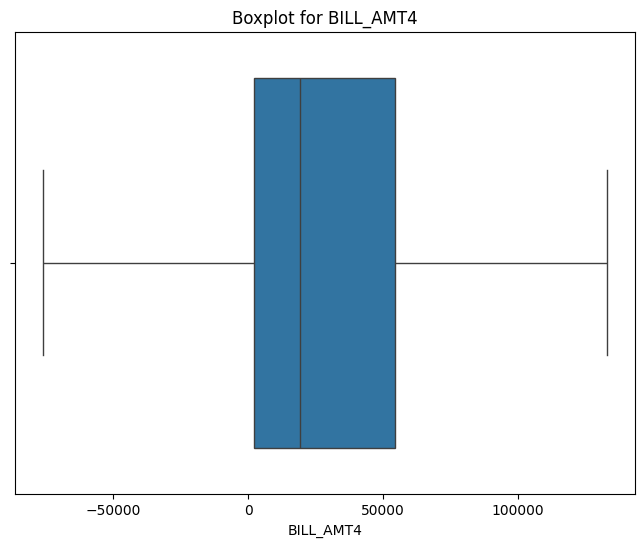

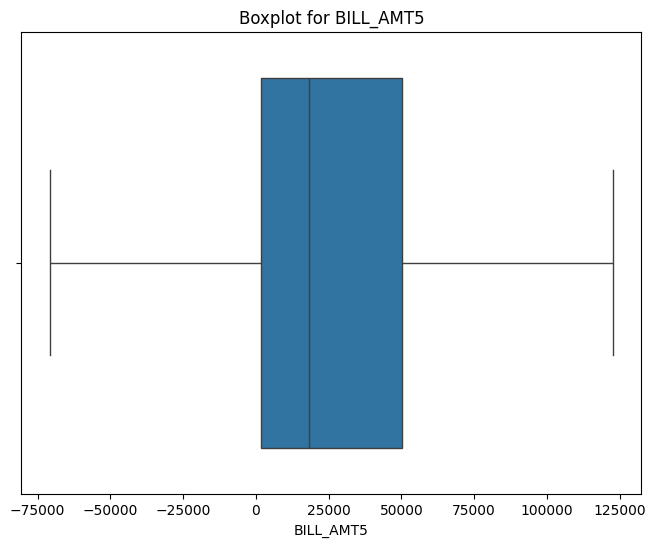

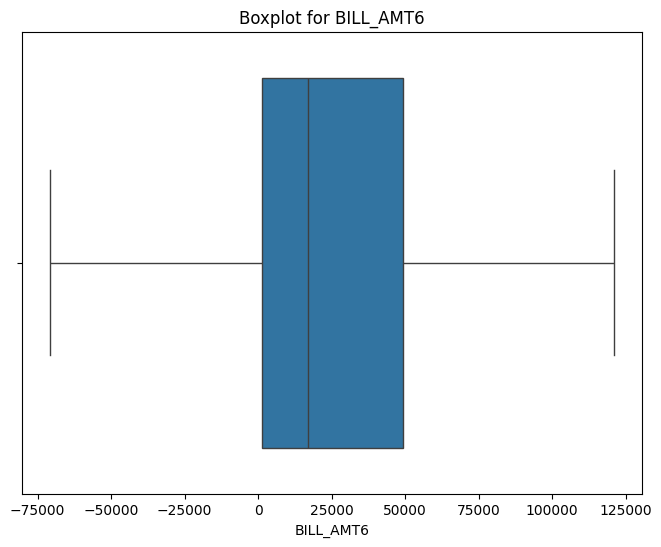

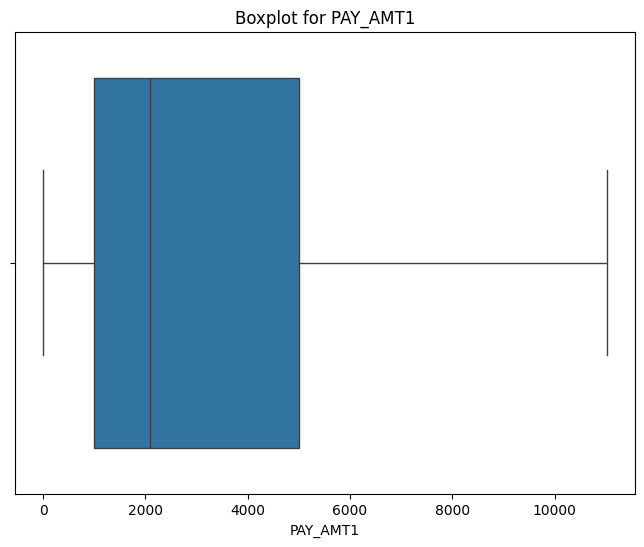

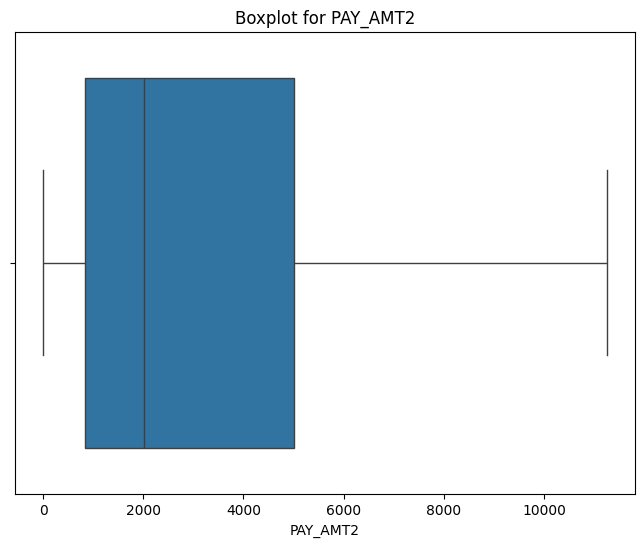

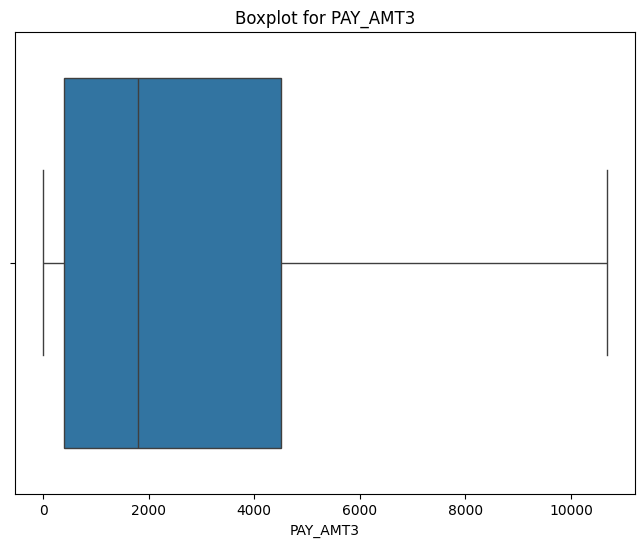

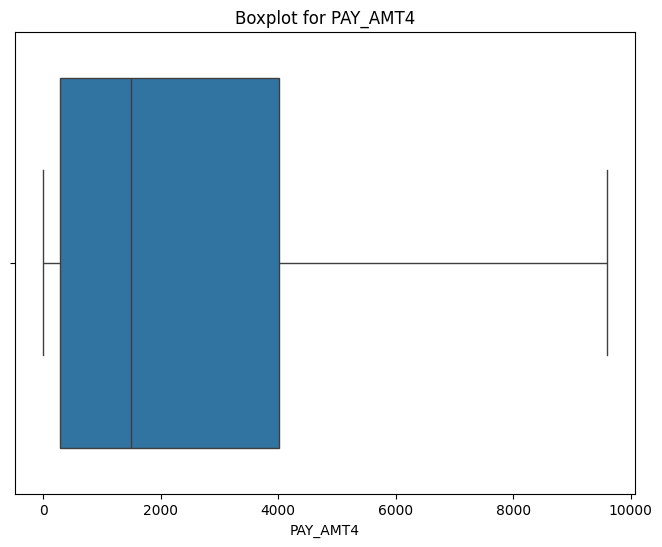

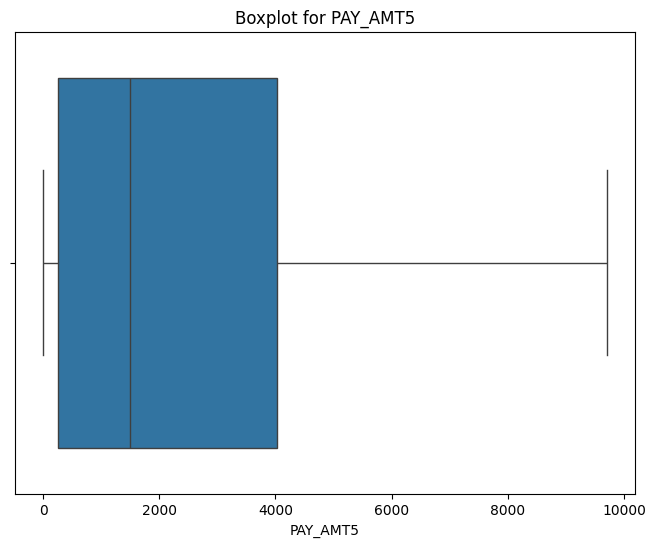

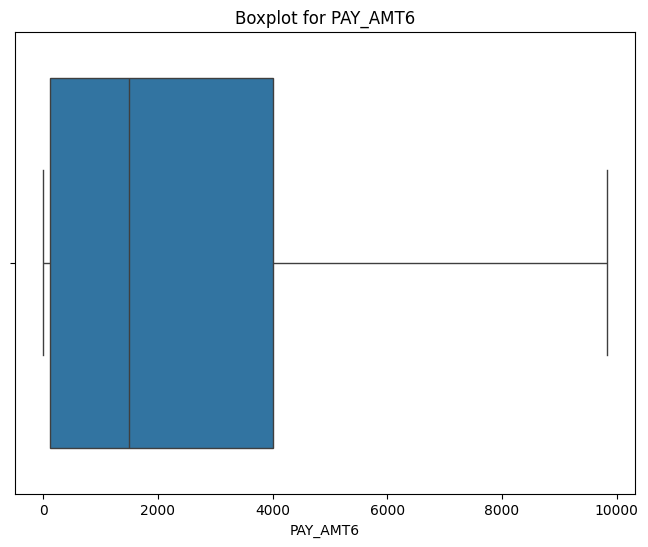

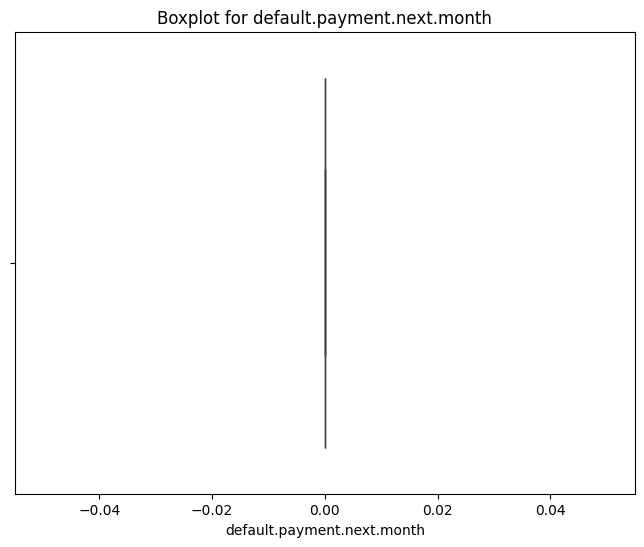

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Loop through each column in the dataframe
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    # Create a boxplot for the current column
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])

    # Set the title to the column name
    plt.title(f'Boxplot for {column}')

    # Show the plot
    plt.show()



After correcting outliers, the boxplots now show a more compact, symmetrical distribution with fewer extreme values, indicating a more accurate and stable data range.

<Axes: >

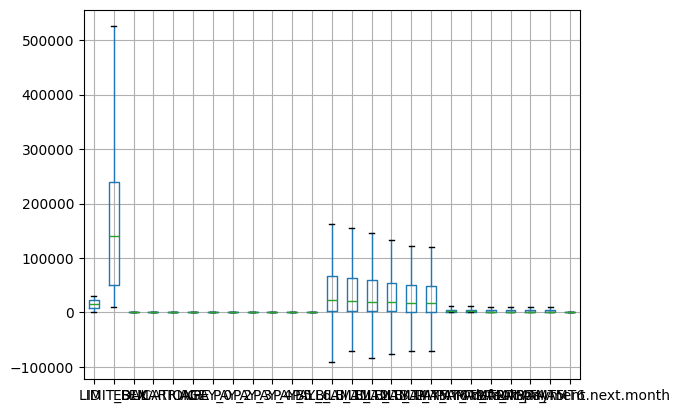

In [37]:
df.boxplot()

In [38]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2.0,1,24.0,1.5,1.5,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,0
1,2,120000.0,2,2.0,2,26.0,-1.0,1.5,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,0
2,3,90000.0,2,2.0,2,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2.0,1,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2.0,1,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,11250.5,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3.0,1,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,11250.5,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3.0,2,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2.0,2,37.0,1.5,1.5,1.5,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,10677.5,4200.0,2000.0,3100.0,0
29998,29999,80000.0,1,3.0,1,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,11015.0,3409.0,1178.0,1926.0,9700.0,1804.0,0


In [39]:
from sklearn.preprocessing import StandardScaler

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)  # X étant votre matrice de caractéristiques
X_scaled

array([[-1.73199307, -1.14808251,  0.81016074, ..., -0.88284168,
        -0.86691997,  0.        ],
       [-1.7318776 , -0.36690123,  0.81016074, ..., -0.88284168,
        -0.22817264,  0.        ],
       [-1.73176213, -0.60125562,  0.81016074, ..., -0.55963962,
         0.72994835,  0.        ],
       ...,
       [ 1.73176213, -1.06996438, -1.23432296, ..., -0.23643755,
         0.12313839,  0.        ],
       [ 1.7318776 , -0.67937374, -1.23432296, ...,  2.25221833,
        -0.29076988,  0.        ],
       [ 1.73199307, -0.91372813, -1.23432296, ..., -0.55963962,
        -0.54754631,  0.        ]])

## Modeling


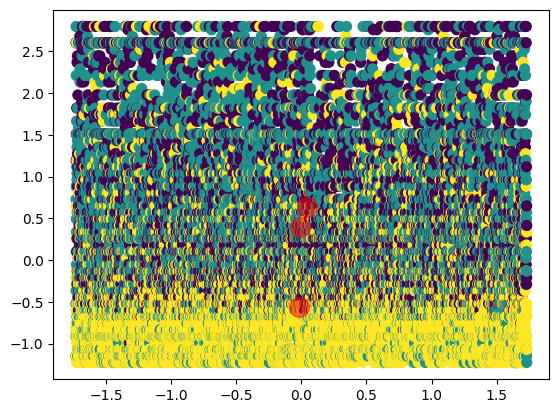

In [40]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Définir le nombre de clusters (k) — vous pouvez utiliser la méthode du coude (Elbow Method)
kmeans = KMeans(n_clusters=3, random_state=42)  # k = 5, vous pouvez ajuster ce paramètre
y_kmeans = kmeans.fit_predict(X_scaled)

# Visualisation des clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, alpha=0.5)
plt.show()


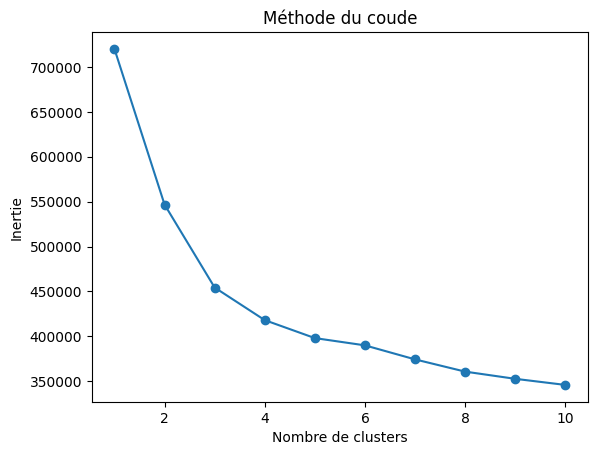

In [41]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude')
plt.show()


In [42]:
from sklearn.cluster import KMeans

# Appliquer K-means avec le nombre optimal de clusters
optimal_k = 3 # Remplacez par le nombre choisi à partir de la méthode du coude ou du score de silhouette
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Afficher les centres des clusters
print("Centres des clusters :")
print(kmeans.cluster_centers_)


Centres des clusters :
[[ 0.04713423  0.63234929 -0.01878447 -0.06438047 -0.06231851  0.09534718
   0.25808273  0.35653801  0.3812427   0.42022409  0.4525285   0.46791429
   1.54756593  1.5990771   1.64067769  1.66195712  1.64739633  1.60726729
   1.00526503  0.96666154  0.93087794  0.94219138  0.93623387  0.89399448
   0.        ]
 [-0.00665626  0.39354202  0.09082038 -0.24365679 -0.09233927  0.10457634
  -0.72708682 -0.96017744 -1.01434206 -1.04225461 -1.021536   -0.96458666
  -0.69376857 -0.72953228 -0.74566257 -0.73567199 -0.71610141 -0.68968589
  -0.20699258 -0.16724705 -0.12366906 -0.13623285 -0.13971562 -0.12453444
   0.        ]
 [-0.01572482 -0.5621081  -0.05785278  0.20528897  0.09434416 -0.11765457
   0.41616494  0.54272136  0.57133326  0.57462425  0.54546168  0.49733236
  -0.17069174 -0.16715801 -0.17357845 -0.19012868 -0.19800816 -0.19970969
  -0.28808166 -0.30014302 -0.31622189 -0.31202119 -0.30688898 -0.29949959
   0.        ]]


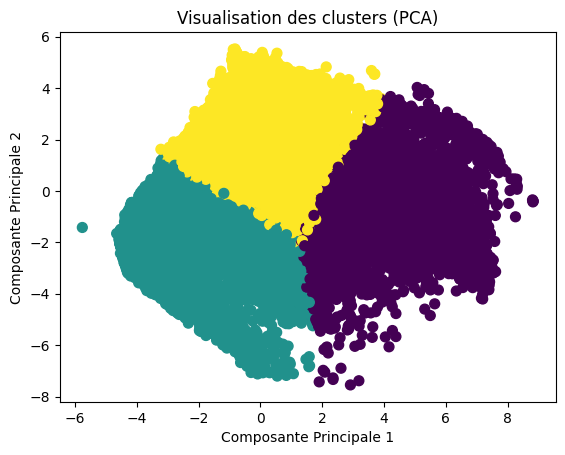

In [43]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Réduction de la dimensionnalité à 2D avec PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualisation des clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', s=50)
plt.title('Visualisation des clusters (PCA)')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.show()


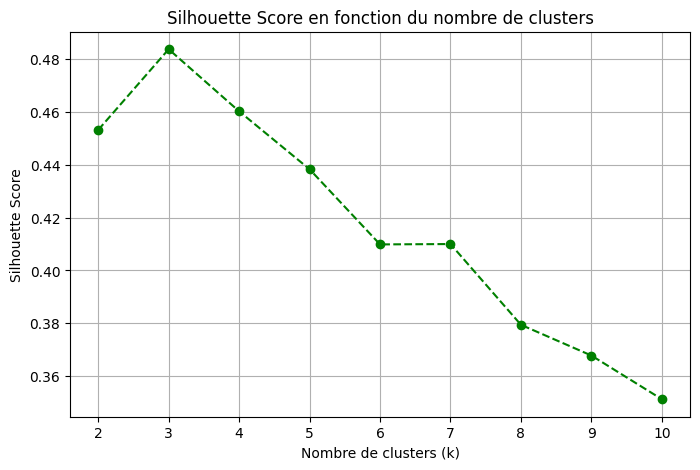

In [44]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def plot_silhouette_scores(df, max_k=10):
    silhouette_scores = []
    k_values = range(2, max_k + 1)

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(df)
        score = silhouette_score(df, labels)
        silhouette_scores.append(score)

    # Tracer les scores
    plt.figure(figsize=(8, 5))
    plt.plot(k_values, silhouette_scores, marker='o', linestyle='--', color='g')
    plt.title('Silhouette Score en fonction du nombre de clusters')
    plt.xlabel('Nombre de clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.xticks(k_values)
    plt.grid(True)
    plt.show()

plot_silhouette_scores(df, max_k=10)


In [45]:
import pandas as pd

# Ajouter les labels de clusters à votre DataFrame
data = pd.DataFrame(df, columns=[
    "ID", "LIMIT_BAL", "SEX", "EDUCATION", "MARRIAGE", "AGE",
    "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6",
    "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5",
    "BILL_AMT6", "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4",
    "PAY_AMT5", "PAY_AMT6", "default.payment.next.month"
])
data['Cluster'] = y_kmeans

# Statistiques descriptives par cluster
for cluster in range(optimal_k):
    print(f"\nStatistiques pour le cluster {cluster}:")
    print(data[data['Cluster'] == cluster].describe())



Statistiques pour le cluster 0:
                 ID      LIMIT_BAL          SEX    EDUCATION     MARRIAGE          AGE        PAY_0        PAY_2        PAY_3        PAY_4  ...      BILL_AMT5      BILL_AMT6      PAY_AMT1      PAY_AMT2      PAY_AMT3     PAY_AMT4     PAY_AMT5     PAY_AMT6  default.payment.next.month  Cluster
count   6052.000000    6052.000000  6052.000000  6052.000000  6052.000000  6052.000000  6052.000000  6052.000000  6052.000000  6052.000000  ...    6052.000000    6052.000000   6052.000000   6052.000000   6052.000000  6052.000000  6052.000000  6052.000000                      6052.0   6052.0
mean   15408.228024  247947.402512     1.594514     1.786269     1.519332    36.315268     0.151272     0.120869     0.119878     0.103272  ...   99464.699190   95872.324789   7009.106742   6836.890615   6158.062707  5615.199686  5628.695638  5514.061963                         0.0      0.0
std     8679.161002  118330.664318     0.491026     0.713886     0.513371     8.425080     

In [46]:
features = df.drop(columns=["ID"])

# Normaliser les données pour éviter que des variables avec des échelles différentes ne dominent
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [47]:
features_scaled

array([[-1.14808251,  0.81016074,  0.2307767 , ..., -0.88284168,
        -0.86691997,  0.        ],
       [-0.36690123,  0.81016074,  0.2307767 , ..., -0.88284168,
        -0.22817264,  0.        ],
       [-0.60125562,  0.81016074,  0.2307767 , ..., -0.55963962,
         0.72994835,  0.        ],
       ...,
       [-1.06996438, -1.23432296,  0.2307767 , ..., -0.23643755,
         0.12313839,  0.        ],
       [-0.67937374, -1.23432296,  1.61129533, ...,  2.25221833,
        -0.29076988,  0.        ],
       [-0.91372813, -1.23432296,  0.2307767 , ..., -0.55963962,
        -0.54754631,  0.        ]])

In [48]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, accuracy_score, precision_score, recall_score, f1_score
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt


# K-Means Clustering
def kmeans_clustering(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data)
    return kmeans.labels_, kmeans.inertia_, silhouette_score(data, kmeans.labels_)

# Improved K-Means (Example logic with adjusted initialization)
def improved_kmeans(data, n_clusters):
    # Using k-means++ initialization
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    kmeans.fit(data)
    return kmeans.labels_, kmeans.inertia_, silhouette_score(data, kmeans.labels_)

# Fuzzy C-Means (requires skfuzzy library)
def fuzzy_c_means(data, n_clusters):
    import skfuzzy as fuzz
    cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(
        data.T, n_clusters, 2, error=0.005, maxiter=1000, init=None
    )
    labels = np.argmax(u, axis=0)
    return labels

# Spectral Clustering
def spectral_clustering(data, n_clusters):
    from sklearn.cluster import SpectralClustering
    spectral = SpectralClustering(n_clusters=n_clusters, affinity='rbf', random_state=42)
    labels = spectral.fit_predict(data)
    return labels

# Evaluate clustering results
def evaluate_clustering(labels, true_labels=None):
    metrics = {}
    if true_labels is not None:
        metrics['accuracy'] = accuracy_score(true_labels, labels)
        metrics['precision'] = precision_score(true_labels, labels, average='macro')
        metrics['recall'] = recall_score(true_labels, labels, average='macro')
        metrics['f1_score'] = f1_score(true_labels, labels, average='macro')
    else:
        metrics['silhouette_score'] = silhouette_score(data, labels)
    return metrics

from collections import Counter
def pseudo_gini_index(clusters):
    total_points = len(clusters)
    cluster_counts = Counter(clusters)
    proportions = [count / total_points for count in cluster_counts.values()]
    gini = 1 - sum(p ** 2 for p in proportions)
    return gini


**KMeans Clustering**

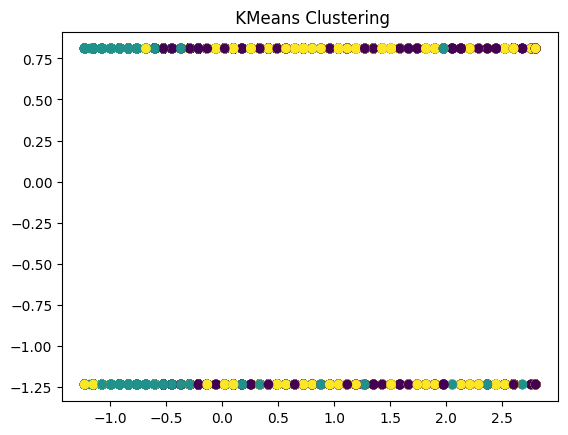

K-Means Evaluation: {'silhouette_score': 0.2569834075308725}


In [49]:
kmeans_labels, kmeans_inertia, kmeans_silhouette = kmeans_clustering(features_scaled, 3)
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=kmeans_labels, cmap='viridis')
plt.title(' KMeans Clustering')
plt.show()
print("K-Means Evaluation:", evaluate_clustering(kmeans_labels))

In [50]:
pseudo_gini = pseudo_gini_index(kmeans_labels)
print(f"Pseudo-Gini Index: {pseudo_gini:.4f}")

Pseudo-Gini Index: 0.6327


**Improved KMeans Clustering**

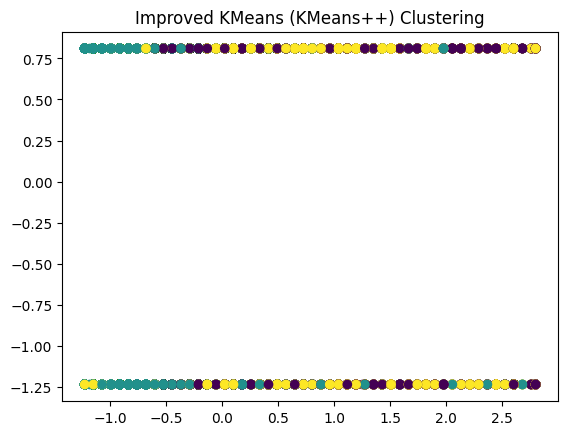

K-Means Evaluation: {'silhouette_score': 0.2569834075308725}


In [51]:
# Clustering methods
kmeansp_labels, kmeans_inertia, kmeans_silhouette = improved_kmeans(features_scaled, 3)

# Evaluation
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=kmeansp_labels, cmap='viridis')
plt.title('Improved KMeans (KMeans++) Clustering')
plt.show()
print("K-Means Evaluation:", evaluate_clustering(kmeansp_labels))

In [52]:
pseudo_gini = pseudo_gini_index(kmeans_labels)
print(f"Pseudo-Gini Index: {pseudo_gini:.4f}")

Pseudo-Gini Index: 0.6327


**Fuzzy C-Means Clustering**

In [53]:
!pip install scikit-fuzzy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 21.3 MB/s eta 0:00:00


Centres des clusters (normalisés) :
 [[ 0.02954799  0.03571183 -0.07553395 -0.02349337  0.01755479 -0.28273066
  -0.37507794 -0.39461973 -0.41254248 -0.41972774 -0.41380268 -0.44342333
  -0.4622718  -0.4725343  -0.47596701 -0.47207547 -0.46103374 -0.2576801
  -0.24799559 -0.23336479 -0.23735196 -0.23441294 -0.22087208  0.        ]
 [ 0.36074365  0.00878629 -0.02684458 -0.03524224  0.0502551   0.19353219
   0.27382288  0.29219592  0.32139542  0.34485667  0.3570196   1.05023091
   1.08230046  1.10481942  1.11930416  1.11585504  1.09701028  0.65564544
   0.62963496  0.60614805  0.62003009  0.61298     0.58526288  0.        ]
 [-0.28387647 -0.01913721  0.07946752  0.04927488 -0.07803354  0.11196124
   0.13712744  0.1393575   0.13602719  0.12852989  0.11791118 -0.23658459
  -0.24053296 -0.24604301 -0.2513388  -0.25232995 -0.25002525 -0.22313847
  -0.21959997 -0.22069831 -0.22543776 -0.22365535 -0.21923069  0.        ]]

Labels des clusters :
 [0 2 2 ... 2 2 2]

Centres des clusters (échelle

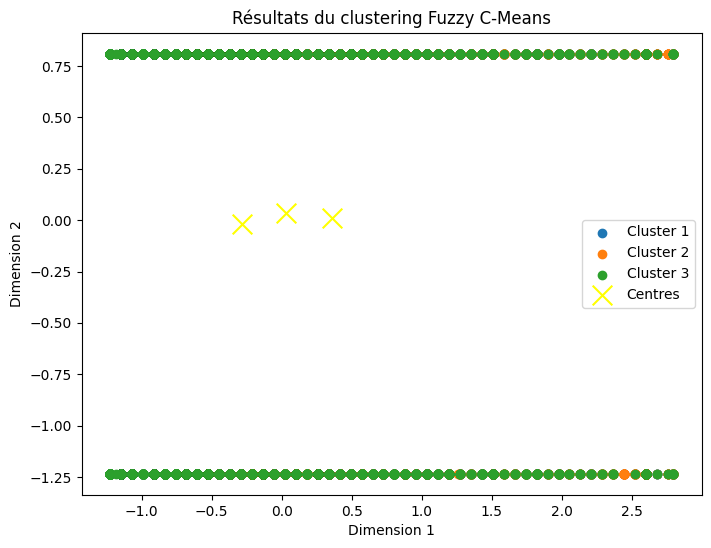

Fuzzy C-Means Evaluation: {'silhouette_score': 0.2369662996504054}


In [54]:

import skfuzzy as fuzz
# Transposer les données pour Fuzzy C-Means
features_scaledt = features_scaled.T

# Appliquer Fuzzy C-Means avec 3 clusters
n_clusters = 3
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    features_scaledt, c=n_clusters, m=2, error=0.005, maxiter=1000, init=None
)

# Identifier les labels des clusters
cluster_labels = np.argmax(u, axis=0)

# Afficher les résultats
print("Centres des clusters (normalisés) :\n", cntr)
print("\nLabels des clusters :\n", cluster_labels)

# Étape optionnelle : revenir à l'échelle originale pour les centres
cntr_original_scale = scaler.inverse_transform(cntr)
print("\nCentres des clusters (échelle originale) :\n", cntr_original_scale)

# Visualiser les résultats avec les deux premières dimensions
plt.figure(figsize=(8, 6))
for i in range(n_clusters):
    plt.scatter(features_scaledt[0, cluster_labels == i], features_scaledt[1, cluster_labels == i], label=f"Cluster {i+1}")
plt.scatter(cntr[:, 0], cntr[:, 1], marker="x", s=200, c="yellow", label="Centres")
plt.title("Résultats du clustering Fuzzy C-Means")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()
plt.show()
print("Fuzzy C-Means Evaluation:", evaluate_clustering(cluster_labels))

In [55]:
pseudo_gini = pseudo_gini_index(cluster_labels)
print(f"Pseudo-Gini Index: {pseudo_gini:.4f}")

Pseudo-Gini Index: 0.6549


**Spectral Clustering**

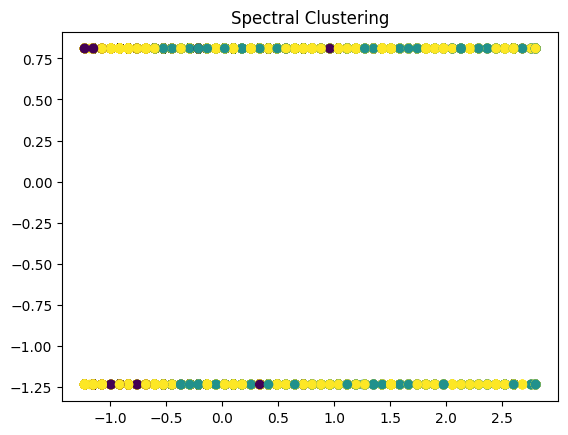

Spectral Clustering Evaluation: {'silhouette_score': 0.02338540451119353}


In [56]:
from sklearn.cluster import SpectralClustering

# Appliquer Spectral Clustering
spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
labels_spectral = spectral.fit_predict(features_scaled)

# Visualisation des résultats
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=labels_spectral, cmap='viridis')
plt.title('Spectral Clustering')
plt.show()

print("Spectral Clustering Evaluation:", evaluate_clustering(labels_spectral))

In [57]:
pseudo_gini = pseudo_gini_index(labels_spectral)
print(f"Pseudo-Gini Index: {pseudo_gini:.4f}")

Pseudo-Gini Index: 0.4136


**Classification**

In [58]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
import skfuzzy as fuzz

l=["LIMIT_BAL", "SEX", "EDUCATION", "MARRIAGE", "AGE",
    "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6",
    "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5",
    "BILL_AMT6", "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4",
    "PAY_AMT5", "PAY_AMT6", "default.payment.next.month"]

# 1. K-means
df_kmeans = pd.DataFrame(features_scaled, columns=l)
df_kmeans['KMeans_Cluster'] = kmeans_labels

# 2. Clustering Spectral
df_spectral = pd.DataFrame(features_scaled, columns=l)
df_spectral['Spectral_Cluster'] = labels_spectral


# 3. Fuzzy C-Means
df_fuzzy = pd.DataFrame(features_scaled, columns=l)
df_fuzzy['Fuzzy_CMeans_Cluster'] = cluster_labels


# 4. K-means amélioré
df_improved_kmeans = pd.DataFrame(features_scaled, columns=l)
df_improved_kmeans['Improved_KMeans_Cluster'] = kmeansp_labels


# Afficher les DataFrames
print("Dataset avec K-means :\n", df_kmeans.head())
print("Dataset avec Clustering Spectral :\n", df_spectral.head())
print("Dataset avec Fuzzy C-Means :\n", df_fuzzy.head())
print("Dataset avec K-means amélioré :\n", df_improved_kmeans.head())

Dataset avec K-means :
    LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE     PAY_0     PAY_2     PAY_3     PAY_4     PAY_5  ...  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  KMeans_Cluster
0  -1.148083  0.810161   0.230777 -1.057295 -1.257372  1.674463  1.746729 -0.743681 -0.717876 -1.752244  ...  -0.846067  -0.827978 -1.001158 -0.773703 -0.904708 -0.884502 -0.882842 -0.866920                         0.0               2
1  -0.366901  0.810161   0.230777  0.858557 -1.037733 -0.951679  1.746729  0.260863  0.313506  0.358003  ...  -0.759465  -0.745143 -1.001158 -0.685670 -0.606697 -0.559114 -0.882842 -0.228173                         0.0               1
2  -0.601256  0.810161   0.230777  0.858557 -0.159179  0.098778  0.234293  0.260863  0.313506  0.358003  ...  -0.471387  -0.433004 -0.566536 -0.544137 -0.606697 -0.559114 -0.559640  0.729948                         0.0               1
3  -0.913728  0.810161   0.230777 -1

In [59]:
!pip install xgboost

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

# Initialize a list to store results
results_list = []

# List of datasets and their target columns
datasets = [df_kmeans, df_spectral, df_fuzzy, df_improved_kmeans]
y_columns = ["KMeans_Cluster", "Spectral_Cluster", "Fuzzy_CMeans_Cluster", "Improved_KMeans_Cluster"]

# Loop through datasets and their respective target columns
for i, data in enumerate(datasets):
    clustering_name = y_columns[i]
    print(f"=== Evaluation for labels generated by {clustering_name} ===")

    # Prepare data
    if clustering_name not in data.columns:
        print(f"Target column '{clustering_name}' missing in the dataset.")
        continue

    X = data.drop(columns=[clustering_name])
    y = data[clustering_name]

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Define classifiers
    classifiers = {
        "Logistic Regression": LogisticRegression(max_iter=500),
        "KNN": KNeighborsClassifier(n_neighbors=5),
        "Gaussian Naive Bayes": GaussianNB(),
        "Random Forest": RandomForestClassifier(random_state=42),
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
    }

    # Evaluate classifiers
    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        # Compute metrics
        metrics = {
            "Accuracy": accuracy_score(y_test, y_pred),
            "Precision": precision_score(y_test, y_pred, average='weighted', zero_division=0),
            "Recall": recall_score(y_test, y_pred, average='weighted', zero_division=0),
            "F1-Score": f1_score(y_test, y_pred, average='weighted', zero_division=0)
        }

        # Add results to the list
        for metric, value in metrics.items():
            results_list.append({
                "Clustering Method": clustering_name,
                "Classifier": name,
                "Metric": metric,
                "Value": value
            })

        # Print results
        print(
            f"{name}: "
            f"Accuracy={metrics['Accuracy']:.2f}, "
            f"Precision={metrics['Precision']:.2f}, "
            f"Recall={metrics['Recall']:.2f}, "
            f"F1-Score={metrics['F1-Score']:.2f}"
        )

# Convert results list to DataFrame
results_df = pd.DataFrame(results_list)

=== Evaluation for labels generated by KMeans_Cluster ===
Logistic Regression: Accuracy=1.00, Precision=1.00, Recall=1.00, F1-Score=1.00
KNN: Accuracy=0.97, Precision=0.97, Recall=0.97, F1-Score=0.97
Gaussian Naive Bayes: Accuracy=0.94, Precision=0.94, Recall=0.94, F1-Score=0.94
Random Forest: Accuracy=0.97, Precision=0.97, Recall=0.97, F1-Score=0.97
Decision Tree: Accuracy=0.95, Precision=0.95, Recall=0.95, F1-Score=0.95


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:21:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost: Accuracy=0.98, Precision=0.98, Recall=0.98, F1-Score=0.98
=== Evaluation for labels generated by Spectral_Cluster ===
Logistic Regression: Accuracy=0.98, Precision=0.98, Recall=0.98, F1-Score=0.98
KNN: Accuracy=0.99, Precision=0.99, Recall=0.99, F1-Score=0.99
Gaussian Naive Bayes: Accuracy=0.96, Precision=0.97, Recall=0.96, F1-Score=0.96
Random Forest: Accuracy=0.98, Precision=0.98, Recall=0.98, F1-Score=0.98
Decision Tree: Accuracy=0.97, Precision=0.97, Recall=0.97, F1-Score=0.97


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:21:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost: Accuracy=0.98, Precision=0.98, Recall=0.98, F1-Score=0.98
=== Evaluation for labels generated by Fuzzy_CMeans_Cluster ===
Logistic Regression: Accuracy=1.00, Precision=1.00, Recall=1.00, F1-Score=1.00
KNN: Accuracy=0.96, Precision=0.96, Recall=0.96, F1-Score=0.96
Gaussian Naive Bayes: Accuracy=0.94, Precision=0.94, Recall=0.94, F1-Score=0.94
Random Forest: Accuracy=0.97, Precision=0.97, Recall=0.97, F1-Score=0.97
Decision Tree: Accuracy=0.94, Precision=0.94, Recall=0.94, F1-Score=0.94


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:21:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost: Accuracy=0.98, Precision=0.98, Recall=0.98, F1-Score=0.98
=== Evaluation for labels generated by Improved_KMeans_Cluster ===
Logistic Regression: Accuracy=1.00, Precision=1.00, Recall=1.00, F1-Score=1.00
KNN: Accuracy=0.97, Precision=0.97, Recall=0.97, F1-Score=0.97
Gaussian Naive Bayes: Accuracy=0.94, Precision=0.94, Recall=0.94, F1-Score=0.94
Random Forest: Accuracy=0.97, Precision=0.97, Recall=0.97, F1-Score=0.97
Decision Tree: Accuracy=0.95, Precision=0.95, Recall=0.95, F1-Score=0.95


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:22:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost: Accuracy=0.98, Precision=0.98, Recall=0.98, F1-Score=0.98


##Metrics Evaluation

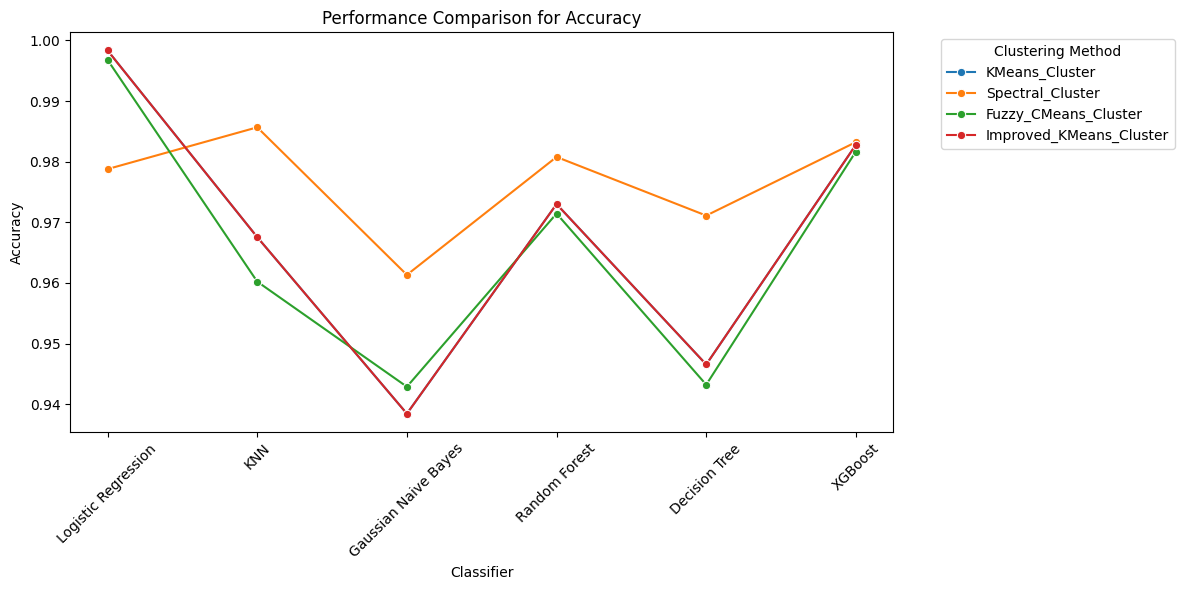

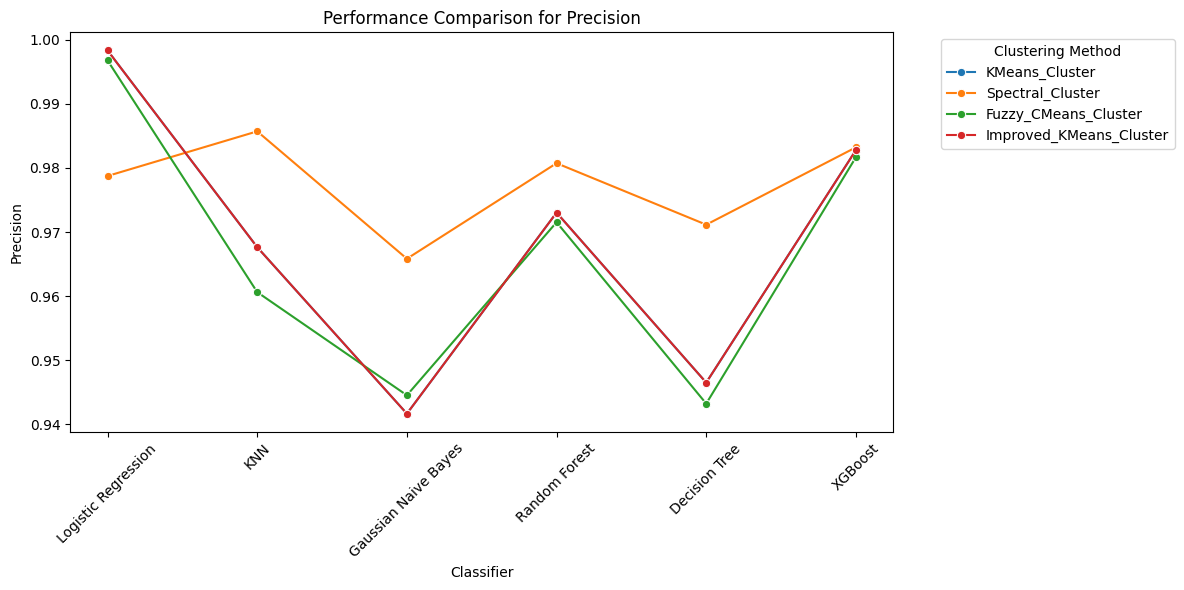

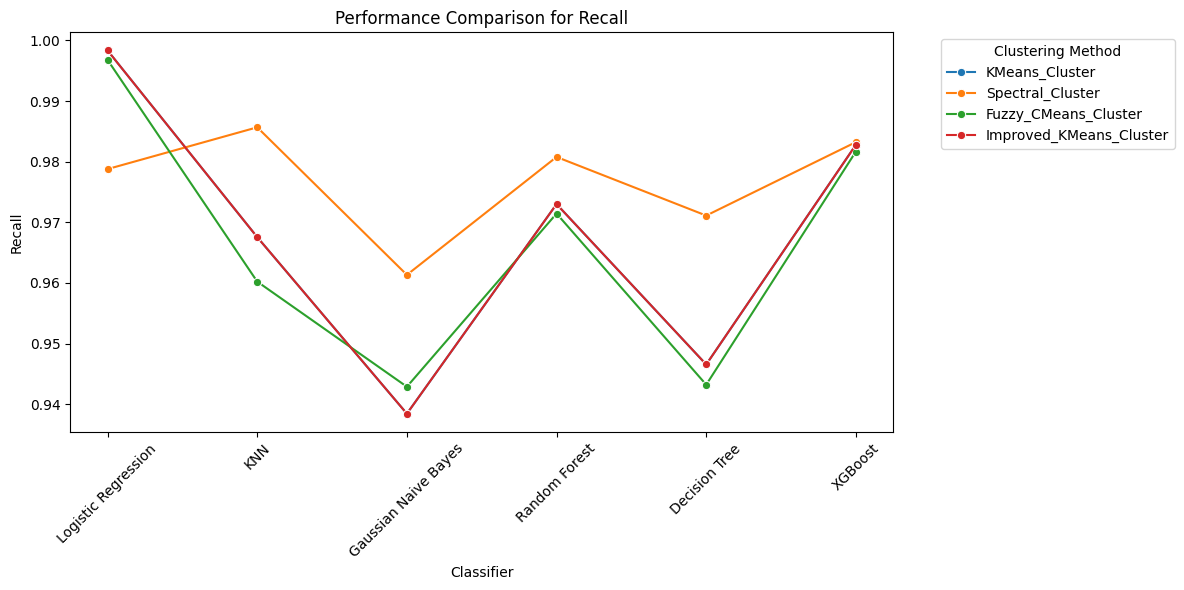

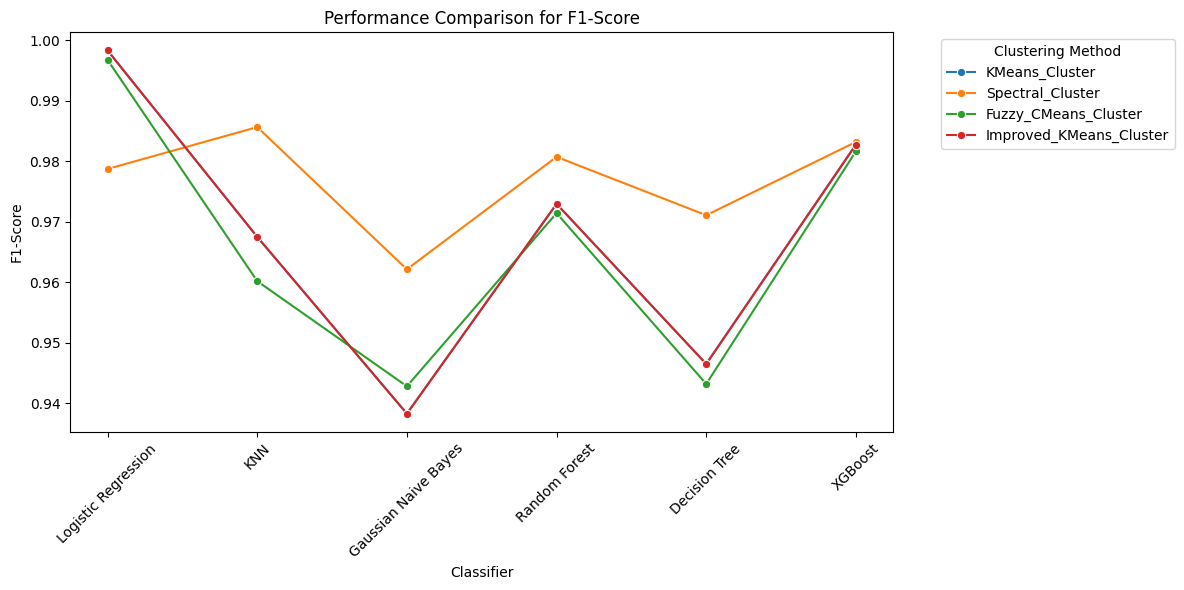

In [61]:
# Define the metrics for which you want separate plots
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]

# Iterate through each metric and plot
for metric in metrics:
    # Filter the DataFrame for the specific metric
    subset = results_df[results_df["Metric"] == metric]

    # Create a line plot
    plt.figure(figsize=(12, 6))
    sns.lineplot(
        data=subset,
        x="Classifier",
        y="Value",
        hue="Clustering Method",
        marker="o"
    )
    plt.title(f"Performance Comparison for {metric}")
    plt.ylabel(metric)
    plt.xlabel("Classifier")
    plt.xticks(rotation=45)
    plt.legend(title="Clustering Method", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()


### Interpretations of Clustering and Classification Algorithm Results

---

#### **1. Labels Generated by KMeans_Cluster**
- *Best performance*: Logistic Regression (Accuracy = 1.00).
  - The labels are perfectly linearly separable.
- *XGBoost, KNN, and Random Forest*: High performance (Accuracy ≈ 0.97-0.98).
  - These models effectively capture the relationships.
- *Gaussian Naive Bayes*: Less performant (Accuracy = 0.94).
  - The independence assumption is not met.

*Conclusion*: KMeans produces well-defined clusters that are suitable for linear separation.

---

#### **2. Labels Generated by Spectral_Cluster**
- *Best performance*: KNN (Accuracy = 0.99) and XGBoost (Accuracy = 0.98).
  - Non-linear relationships are well captured.
- *Logistic Regression*: Good performance (Accuracy = 0.98).
  - Indicates some linear separability.
- *Gaussian Naive Bayes*: Less performant (Accuracy = 0.96).

*Conclusion*: Spectral Clustering is better suited for models capturing non-linear relationships.

---

#### **3. Labels Generated by Fuzzy_CMeans_Cluster**
- *Best performance*: Logistic Regression (Accuracy = 1.00).
  - Excellent linear separation.
- *XGBoost and Random Forest*: Very good performance (Accuracy ≈ 0.97-0.98).
- *KNN*: Less performant (Accuracy = 0.96).
  - Variability possibly due to fuzzy clustering.
- *Gaussian Naive Bayes*: Lower performance (Accuracy = 0.94).

*Conclusion*: The labels are well linearly separable.

---

#### **4. Labels Generated by Improved_KMeans_Cluster**
- *Best performance*: Logistic Regression (Accuracy = 1.00).
  - Labels are perfectly linear.
- *XGBoost and Random Forest*: Very good performance (Accuracy ≈ 0.97-0.98).
- *Gaussian Naive Bayes*: Less performant (Accuracy = 0.94).
- *KNN*: Decent performance (Accuracy = 0.97).

*Conclusion*: Improved KMeans produces labels of similar quality to standard KMeans.

---

#### **General Comparison of Clustering Methods**
1. *KMeans and Improved KMeans*: Excellent performance, suitable for linear separations.
2. *Spectral Clustering*: Preferred for capturing complex relationships, works well with KNN or XGBoost.
3. *Fuzzy C-Means*: Produces clusters of quality comparable to KMeans.
4. *Gaussian Naive Bayes*: Less suited, limited by its independence assumption.

*Recommendations*:
- *Linear separation*: Use *KMeans or Improved KMeans* with Logistic Regression.
- *Complex relationships*: Prefer *Spectral Clustering* with models like KNN or XGBoost.
